<a href="https://colab.research.google.com/github/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO MÓDULO 3 - BOOTCAMP DATASCIENCE APLICADO 2 - PARTE 3**
---
## Análise e Previsão de Séries Temporais dos dados de Covid-19 no Sertão Central, CE

# **1. INTRODUÇÃO**

## 1.1 O Sertão Central

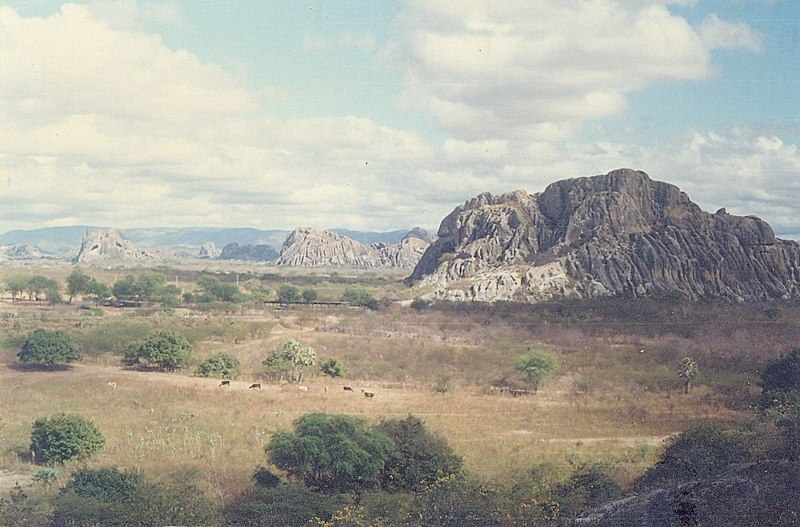

Imagem:[Tok de História](https://tokdehistoria.com.br/2013/10/05/1997-participando-do-sertao-central-do-ceara-polo-de-ecoturismo-do-sertao/)

**O que é o Sertão Central?**

É um território abrange uma área de  15.678,4 km², é composto pelos municípios de **Banabuiú, Choró, Quixadá, Quixeramobim, Deputado Irapuan Pinheiro, Ibaretama, Milhã, Mombaça, Pedra Branca, Piquet Carneiro, Senador Pompeu e Solonópole**. 

Foi uma região que por muito tempo viveu do cultivo do algodão como principal atividade econômica, mas hoje se destaca pelas suas ofertas de serviço de equipamentos da saúde como é o caso do Hospital Regional do Sertão Central em Quixeramobim e as diversas insituições de ensino superior em Quixadá.

A localização estratégica da região no centro do Estado do Ceará, faz dos municipios do Sertão Central pontos de convergência das diveras partes do Estado. Apartir dessas informações, busca-se aqui analisar os casos de covid-19 nos dois principais municipios do Sertão Central e realizar um modelo de previsão de Séries Temporais para os mesmos.

## 1.2 O Que São Séries Temporais?

Série temporal é uma sequência de dados que seguem uma ordem cronólogica, elas existem para treinar modelos de predição que auxiliem a partir de informações do passado conseguir estipular cenários futuros.

Diversas são as ferramentas capazes de auxiliar na criação de um modelo de predição, para esse trabalho em específico será utilizada a ferramenta Facebook Prophet. O Prophet foi desenvolvido tendo em mente o objetivo de criar previsões de negócios de alta qualidade, a biblioteca tenta solucionar algumas dificuldades basante comuns a muitas séries temporais, como por exemplo:

* Efeitos Sazonais causados pelo comportamento humano, ciclos anuais, semanais e anuais, quedas e picos de feriados

* Mudanças na tendência devido a novos produtos e eventos

* Outliers, ou pontos fora da curva

Um dos pontos fortes do Prophet é sua natureza intuitiva e capacidade de atender problemas tão bem quanto modelos de analises mais complexos. Olhando um pouco a sua essência, sabe-se que o Prophet utiliza o modelo de regressão aditiva y(t) e compreende os seguintes componentes:

$$ y(t) = g(t) + s(t) + h(t) + et$$

onde: 
* Tendência(g(t)):  Será o responsavel modelar as mudanças não periódicas.
* Sazonalidade(s(t)): Representa as mudanças períodicas
* Componente de feriados(h(t)): Permite a entrada de informações dos feriados e eventos

O prophet precisa ser abastecido com duas informações **ds** e **y**, o primeiro representa o tempo(são as datas) e o segundo representa os dados que serão aplicados no modelo de predição, esse ultimo pode e deve ser separado em dois dataframes diferentes: o **df_treino** e o **df_teste**, dessa forma é possivel avaliar a perfomance do modelo, bem como sua capacidade de previsão.

Dito isso, vamos começar :)

# **2. PRBOLEMA**

O problema que noteia essa parte 3 do projeto é investigar como se deram os casos e os óbitos de covid - 19 no Sertão Central. Agora  o projeto será aplicado a escala municipal. São estabelecidas aqui cinco hípoteses:

**Hipotese1**: Quixadá e Quixeramobim são as cidades com maiores numeros de casos e óbitos do Sertão Central

**Hipotese2**: Quixadá é o municipio com maior número de casos e óbitos

**Hipotese3**: Dep.Irapuã Pinheiro configura como uma das que possui menos casos

**Hipotese4**: As taxas de crescimento dos casos e dos óbitos coincidem com os picos referentes as datas percebidas na analise das regiões

**Hipotese 5**: Mesmo com a vacinação as curvas de casos novos não se estabilizaram

Pode-se afirmar que esse projeto tem como objetivo:

* Analisar os dados referentes aos casos Acumulados e Novos de corona vírus nos municipios do Sertão Central

* Analisar os dados referentes aos obitos Acumulados e Novos de corona vírus nos municipios do Sertão Central

* Encontrar os municipios mais afetados e os menos afetados 

* Criar um modelo de predição e testar sua perfomance


##2.1 Metodologia

Esse projeto foi dividido em 3 partes

1. [A primeira parte](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_1.ipynb), refere-se a filtragem e preparação dos dados, filtrando em novos dataframes.

2. Após essa filtragem dividiu-se o projeto em duas frentes:
* [A segunda parte](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_2_.ipynb) é uma analise dos dados referentes as regiões, enxergando a curva dos casos Acumulados e óbitosAcumulados, assim como a espacialização desses dados em mapas. 
* A terceira parte é uma analise dos dados referentes aos dois múnicipios mais afetados do Sertão Central do Ceará, além da elaboração de uma previsão das séries temporais dos municípios.

# **3. PREPARAÇÃO DOS DADOS**

Nessa etapa do proccesso são importadas as bibliotecas que serão utilizadas, as funções e listas criadas 

## 3.1 Bibliotecas

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import linregress
from sklearn import metrics
import statsmodels.tsa.stattools as smt
from pandas.plotting import autocorrelation_plot
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import warnings
warnings.filterwarnings('ignore')

## 3.2 Função e Dicionário de Cores

In [ ]:
def filtra_MUN(dataframe,municipio):
  dataframe = dataframe.drop(columns=['index','coduf','codmun','total','regiao'])
  dataframe=dataframe.query(f'municipio=="{municipio}"')
  dataframe = dataframe.groupby(by=['municipio','ano','data']).sum()
  dataframe=dataframe.reset_index()
  return dataframe

In [ ]:
def filtra_MUN2(dataframe):
  dataframe = dataframe.drop(columns=['index','coduf','codmun','regiao','data','ano'])
  dataframe = dataframe.groupby(by=['municipio']).sum()
  dataframe=dataframe.reset_index()
  #dataframe = dataframe.query(f'ano =={ano}')
  dataframe=dataframe.sort_values(by='total',ascending=False)
  return dataframe

In [ ]:
def filtra_MUN3(dataframe,municipio1,municipio2):
  cidades = [municipio1,municipio2]
  dataframe = dataframe.drop(columns=['index','coduf','codmun','regiao','data','ano'])
  dataframe=dataframe.query(f'municipio in @cidades')
  dataframe=dataframe.reset_index()
  dataframe=dataframe.sort_values(by='total',ascending=False)
  return dataframe

In [ ]:
def plota1(df_treino,df_teste,cidade):
  fig, ax = plt.subplots(3,2, figsize=(18,12))
  i=0
  j=0

  for intervalo in range(30,210,30):

      #descobrindo as datas de possiveis changepoints
      estimator = Prophet()
      estimator.fit(df_treino)
      datas = df_treino.loc[df_treino['ds'].isin(estimator.changepoints)]
      datas = datas['ds'].tolist()

      #criando modelo
      modelo = Prophet(changepoint_prior_scale=0.1, changepoints=datas,changepoint_range=0.90)
      modelo.fit(df_treino)

      #criando a previsão
      previsao = modelo.predict(modelo.make_future_dataframe(periods=intervalo))
      fig = modelo.plot(previsao, xlabel='Período', ylabel='Número de casos novos', ax=ax[i,j])
      
      #adicionando os changepoints
      a= add_changepoints_to_plot(fig.gca(),modelo,previsao, cp_color='gray')
      
      ax[i,j].plot(df_teste['ds'], df_teste['y_teste'], '.r')
      ax[i,j].set_title(f'Previsão de {intervalo} dias em {cidade} ', loc='left',color='grey',fontweight = 'bold')
      ax[i,j].spines['bottom'].set_color('darkgrey')
      ax[i,j].spines['left'].set_color('darkgrey')
      ax[i,j].spines['right'].set_visible(False)
      ax[i,j].spines['top'].set_visible(False)
      ax[i,j].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
      #modelo.plot_components(previsao);
      plt.sca(ax[i,j])
      
      if j == 1:
          j=0
          i+=1
      else:
          j+=1

  plt.show()

In [ ]:
def plota2(df_treino,df_teste,cidade, feriados):
  fig, ax = plt.subplots(3,2, figsize=(18,12))
  i=0
  j=0
  for intervalo in range(30,210,30):

      #descobrindo as datas de possiveis changepoints
      estimator = Prophet()
      estimator.fit(df_treino)
      datas = df_treino.loc[df_treino['ds'].isin(estimator.changepoints)]
      datas = datas['ds'].tolist()

      #criando modelo
      modelo = Prophet(changepoint_prior_scale=5.5,changepoint_range=0.90,changepoints=datas, holidays=feriados, seasonality_mode='multiplicative',weekly_seasonality=7)
      modelo.fit(df_treino)

      #criando a previsão
      previsao = modelo.predict(modelo.make_future_dataframe(periods=intervalo))
      fig = modelo.plot(previsao, xlabel='Período', ylabel='Número de casos novos', ax=ax[i,j])
      #adicionando os changepoints
      a= add_changepoints_to_plot(fig.gca(),modelo,previsao, cp_color='gray')
      
      ax[i,j].plot(df_teste['ds'], df_teste['y_teste'], '.r')
      ax[i,j].set_title(f'Previsão de {intervalo} dias em {cidade} ',loc='left',color='grey',fontweight = 'bold')
      ax[i,j].spines['bottom'].set_color('darkgrey')
      ax[i,j].spines['left'].set_color('darkgrey')
      ax[i,j].spines['right'].set_visible(False)
      ax[i,j].spines['top'].set_visible(False)
      ax[i,j].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
      #modelo.plot_components(previsao);
      plt.sca(ax[i,j])
      
      if j == 1:
          j=0
          i+=1
      else:
          j+=1

  plt.show()

In [ ]:
def plota_components(df_treino,df_teste,cidade, feriados):
  for intervalo in range(30,90,30):

    #descobrindo as datas de possiveis changepoints
    estimator = Prophet()
    estimator.fit(df_treino)
    datas = df_treino.loc[df_treino['ds'].isin(estimator.changepoints)]
    datas = datas['ds'].tolist()

    #criando modelo
    modelo = Prophet(changepoint_prior_scale=0.1,changepoint_range=0.90,changepoints=datas, holidays=feriados, seasonality_mode='multiplicative',weekly_seasonality=7)
    modelo.fit(df_treino)

    #criando a previsão
    previsao = modelo.predict(modelo.make_future_dataframe(periods=intervalo))
    components_fig=modelo.plot_components(previsao,figsize=(20,10));
    axes = components_fig.get_axes()
    axes[0].set_xlabel('Data',color='grey')
    axes[0].set_ylabel('Tendência Geral',color='grey')
    axes[1].set_xlabel('Data',color='grey')
    axes[1].set_ylabel('Feriados',color='grey')
    axes[2].set_xlabel('Dias da Semana',color='grey')
    axes[2].set_ylabel('Sazonalidade Semanal',color='grey')
    plt.suptitle(f'Componentes do modelo de predição de {cidade} em {intervalo} dias',color='grey',fontweight = 'bold', fontsize=16)
    components_fig.subplots_adjust(top=0.90)
    for p in range (0,3):
      axes[p].spines['bottom'].set_color('darkgrey')
      axes[p].spines['left'].set_color('darkgrey')
      axes[p].spines['right'].set_visible(False)
      axes[p].spines['top'].set_visible(False)
      axes[p].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
    plt.sca(axes[2])
    plt.xticks(range(0,7), ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

    plt.show()

In [ ]:
def sem_outlier(df_treino,feriados):
    estimator = Prophet()
    estimator.fit(df_treino)
    datas = df_treino.loc[df_treino['ds'].isin(estimator.changepoints)]
    datas = datas['ds'].tolist()
    modelo = Prophet(changepoint_prior_scale=0.1,changepoint_range=0.90,changepoints=datas, holidays=feriados, seasonality_mode='multiplicative',weekly_seasonality=7)
    modelo.fit(df_treino)
    previsao = modelo.predict(modelo.make_future_dataframe(periods=0))

    novo_y = df_treino.reset_index()
    sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]
    
    return sem_outliers

In [ ]:
def plota_outlier(df_outlier,df_teste,feriados,cidade):
  fig, ax = plt.subplots(3,2, figsize=(18,12))
  i=0
  j=0
  periodo = [52,55,62,65,72,75] 
  for intervalo in periodo:
    estimator = Prophet()
    estimator.fit(df_outlier)
    datas = df_outlier.loc[df_outlier['ds'].isin(estimator.changepoints)]
    datas = datas['ds'].tolist()
    modelo_feriados = Prophet(changepoint_prior_scale=5.5,changepoint_range=0.90,changepoints=datas ,holidays=feriados_quixada, seasonality_mode='multiplicative',weekly_seasonality=7)
    modelo_feriados.fit(df_outlier)
    dataframefuturo=modelo_feriados.make_future_dataframe(periods=intervalo)
    previsao=modelo_feriados.predict(dataframefuturo)
    fig = modelo_feriados.plot(previsao,figsize=(15,10), ax=ax[i,j])
    plt.plot(df_teste['ds'],df_teste['y_teste'],'.r')
    ax[i,j].set_xlabel('Data', color='gray')
    ax[i,j].set_ylabel('Tendência Geral',color='gray')
    ax[i,j].plot(df_teste['ds'], df_teste['y_teste'], '.r')
    ax[i,j].set_title(f'Previsão de {intervalo} dias em {cidade} ',loc='left',color='grey',fontweight = 'bold')
    ax[i,j].spines['bottom'].set_color('darkgrey')
    ax[i,j].spines['left'].set_color('darkgrey')
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
    #modelo.plot_components(previsao);
    plt.sca(ax[i,j])
      
    if j == 1:
        j=0
        i+=1
    else:
        j+=1

  plt.show()

In [ ]:
def previsao(df_outlier, df_teste,feriado,cidade,periodo:int): 
  estimator = Prophet()
  estimator.fit(df_outlier)
  datas = df_outlier.loc[df_outlier['ds'].isin(estimator.changepoints)]
  datas = datas['ds'].tolist()

  modelo = Prophet(changepoint_prior_scale=5.5,changepoint_range=0.90,changepoints=datas ,holidays=feriado, seasonality_mode='multiplicative',weekly_seasonality=7) 
  modelo.fit(df_outlier)
  dataframefuturo = modelo.make_future_dataframe(periods=periodo)
  previsao = modelo.predict(dataframefuturo)
  g= modelo.plot(previsao,figsize=(15,10))
  plt.plot(df_teste['ds'],df_teste['y_teste'],'.r')
  axes = g.get_axes()
  axes[0].set_title(f'Série Temporal considerando {periodo} dias - {cidade}',loc='left',color='grey',fontweight = 'bold')
  axes[0].set_xlabel('Data',color='gray')
  axes[0].set_ylabel('Casos Novos',color='gray')
  axes[0].spines['bottom'].set_color('darkgrey')
  axes[0].spines['left'].set_color('darkgrey')
  axes[0].spines['right'].set_visible(False)
  axes[0].spines['top'].set_visible(False)
  axes[0].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
  plt.show()

In [ ]:
def previsao_components(df_outlier, df_teste,feriado,cidade,periodo:int):  
  estimator = Prophet()
  estimator.fit(df_outlier)
  datas = df_outlier.loc[df_outlier['ds'].isin(estimator.changepoints)]
  datas = datas['ds'].tolist()

  modelo = Prophet(changepoint_prior_scale=5.5,changepoint_range=0.90,changepoints=datas ,holidays=feriado, seasonality_mode='multiplicative',weekly_seasonality=7) 
  modelo.fit(df_outlier)
  dataframefuturo = modelo.make_future_dataframe(periods=periodo)
  previsao = modelo.predict(dataframefuturo)
  components = modelo.plot_components(previsao,figsize=(20,10));
  axes = components.get_axes()
  axes[0].set_xlabel('Data', color='gray')
  axes[0].set_ylabel('Tendência Geral',color='gray')
  axes[1].set_xlabel('Data',color='gray')
  axes[1].set_ylabel('Feriados',color='gray')
  axes[2].set_xlabel('Dias da Semana',color='gray')
  axes[2].set_ylabel('Sazonalidade Semanal',color='gray')
  plt.suptitle(f'Componentes do modelo de predição de {cidade} em {periodo} dias',color='grey',fontweight = 'bold', fontsize=16)
  components.subplots_adjust(top=0.90)
  for p in range (0,3):
    axes[p].spines['bottom'].set_color('darkgrey')
    axes[p].spines['left'].set_color('darkgrey')
    axes[p].spines['right'].set_visible(False)
    axes[p].spines['top'].set_visible(False)
    axes[p].grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
  plt.sca(axes[2])
  plt.xticks(range(0,7), ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

  plt.show()

In [ ]:
def modelo_cross_v(df_outlier, df_teste,feriado):  
  estimator = Prophet()
  estimator.fit(df_outlier)
  datas = df_outlier.loc[df_outlier['ds'].isin(estimator.changepoints)]
  datas = datas['ds'].tolist()

  modelo = Prophet(changepoint_prior_scale=5.5,changepoint_range=0.90,changepoints=datas ,holidays=feriado, seasonality_mode='multiplicative',weekly_seasonality=7) 
  modelo.fit(df_outlier)
  dataframefuturo = modelo.make_future_dataframe(periods=55)
  previsao = modelo.predict(dataframefuturo)
  return modelo

In [ ]:
municipios = {
    'Pedra Branca': 'lightgray',
    'Mombaça':'lightgray',
    'Senador Pompeu':'lightgray',
    'Solonópole':'lightgray',
    'Piquet Carneiro': 'lightgray',
    'Milhã':'lightgray',
    'Ibicuitinga':'lightgray',
    'Ibaretama':'lightgray',
    'Banabuiú':'lightgray',
    'Choró':'lightgray',
    'Deputado Irapuan Pinheiro':'lightgray'
    }
    

In [ ]:
municipios2 = {
    'Quixadá':'firebrick',
    'Quixeramobim':'teal',
    'Pedra Branca': 'lightgray',
    'Mombaça':'lightgray',
    'Senador Pompeu':'lightgray',
    'Solonópole':'lightgray',
    'Piquet Carneiro': 'lightgray',
    'Milhã':'lightgray',
    'Ibicuitinga':'lightgray',
    'Ibaretama':'lightgray',
    'Banabuiú':'lightgray',
    'Choró':'lightgray',
    'Deputado Irapuan Pinheiro':'lightgray'
    }

## 3.3 Inserindo os dados

Serão inseridos aqui os Dataframes já tratados, modificados e com alguns filtros. Todos eles foram obtidos a partir do dataset coletado da plataforma oficial do COVID. E você pode conferir o passo a passo de filtragem [na parte 1](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_1.ipynb) desse projeto. Como dito anteriormente, toda a base de dados foi baseada no portal de COVID do governo federal e encontra-se disponivel no link do [GitHub](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/tree/main/Data) desse projeto:

In [ ]:
url1 = 'https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Data/Dataframes/Casos_COVID-19_CEAR%C3%81_.csv?raw=true' #CEARÁ COMPLETO
dados_CE=pd.read_csv(url1, sep=',')
dados_CE.drop('ano',axis=1,inplace=True)
sertao_central=dados_CE.query('regiao == "Sertão Central" ')
sertao_central.head()

index municipio  coduf  ...  obitosAcumulado obitosNovos          regiao
2667  121010  Banabuiú     23  ...                0           0  Sertão Central
2668  121011  Banabuiú     23  ...                0           0  Sertão Central
2669  121012  Banabuiú     23  ...                0           0  Sertão Central
2670  121013  Banabuiú     23  ...                0           0  Sertão Central
2671  121014  Banabuiú     23  ...                0           0  Sertão Central

[5 rows x 11 columns]

In [ ]:
sertao_central.dtypes

index                 int64
municipio            object
coduf                 int64
codmun                int64
data                 object
populacaoTCU2019    float64
casosAcumulado      float64
casosNovos            int64
obitosAcumulado       int64
obitosNovos           int64
regiao               object
dtype: object

In [ ]:
sertao_central['data'] = pd.to_datetime(sertao_central['data'],format='%Y-%m-%d')
sertao_central['ano'] = pd.DatetimeIndex(sertao_central['data']).year

In [ ]:
sertao_central['total'] = sertao_central.sum(axis=1)
sertao_central=sertao_central.sort_values(by='total',ascending=False)
sertao_central

index                  municipio  coduf  ...          regiao   ano     total
77743  189024                    Quixadá     23  ...  Sertão Central  2021  519264.0
77741  189022                    Quixadá     23  ...  Sertão Central  2021  519107.0
77742  189023                    Quixadá     23  ...  Sertão Central  2021  519093.0
77737  189018                    Quixadá     23  ...  Sertão Central  2021  519080.0
77740  189021                    Quixadá     23  ...  Sertão Central  2021  519074.0
...       ...                        ...    ...  ...             ...   ...       ...
6735   125078  Deputado Irapuan Pinheiro     23  ...  Sertão Central  2020  367172.0
6734   125077  Deputado Irapuan Pinheiro     23  ...  Sertão Central  2020  367171.0
6733   125076  Deputado Irapuan Pinheiro     23  ...  Sertão Central  2020  367170.0
6732   125075  Deputado Irapuan Pinheiro     23  ...  Sertão Central  2020  367169.0
6731   125074  Deputado Irapuan Pinheiro     23  ...  Sertão Central  2020  367168.0

[5928 rows x 13 columns]

# **4.0 VISUALIZAÇÃO** 

A visualização será dividida nas seguintes partes:

1. *Visualizando os municípios do Sertão Central*

2. *Visualizando os municípios de Quixadá e Quixeramobim*

  * 2.1 *Autocorrelação*
  * 2.2 *Média móvel* 

4. *Visualizando a Série Temporal*

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (20,10)

# 4.1 Visualizando os municípios do Sertão Central

As primeiras analises seguem o mesmo modelo das realizadas na [parte 2](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_2_.ipynb) desse projeto, rankear as localidades pelos seus dados e tentar encontrar os municipios mais afetados e os menos afetados, levantar possíveis hipoteses do porque 


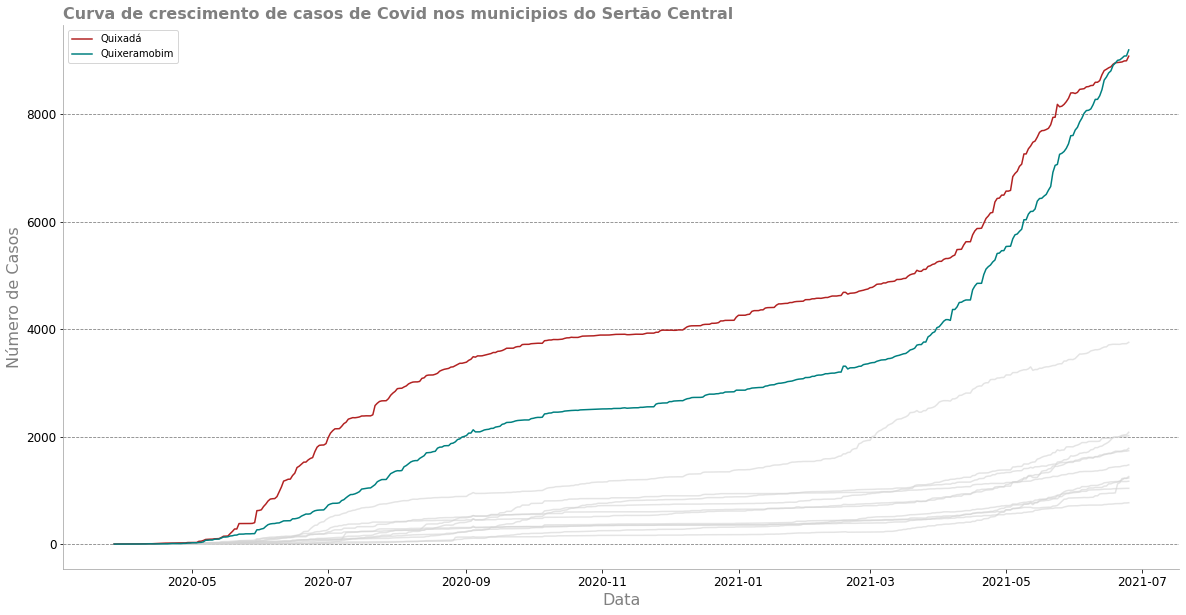

In [ ]:
for dados,cores in municipios.items():
  dataframe = filtra_MUN(sertao_central,dados)
  label = dados
  ax= sns.lineplot(x='data',y='casosAcumulado',data=dataframe,color=cores, alpha=0.6)
ax=sns.lineplot(x='data',y='casosAcumulado',data=filtra_MUN(sertao_central,'Quixadá'),color='firebrick',label='Quixadá')
ax=sns.lineplot(x='data',y='casosAcumulado',data=filtra_MUN(sertao_central,'Quixeramobim'),color='teal',label='Quixeramobim')
plt.title('Curva de crescimento de casos de Covid nos municipios do Sertão Central', color='gray', fontsize=16, fontweight='bold',loc='left')
plt.ylabel('Número de Casos', color='gray',fontsize=16)
plt.xlabel('Data', color='gray',fontsize=16)
plt.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax.legend(loc = 'best', fontsize=10)
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

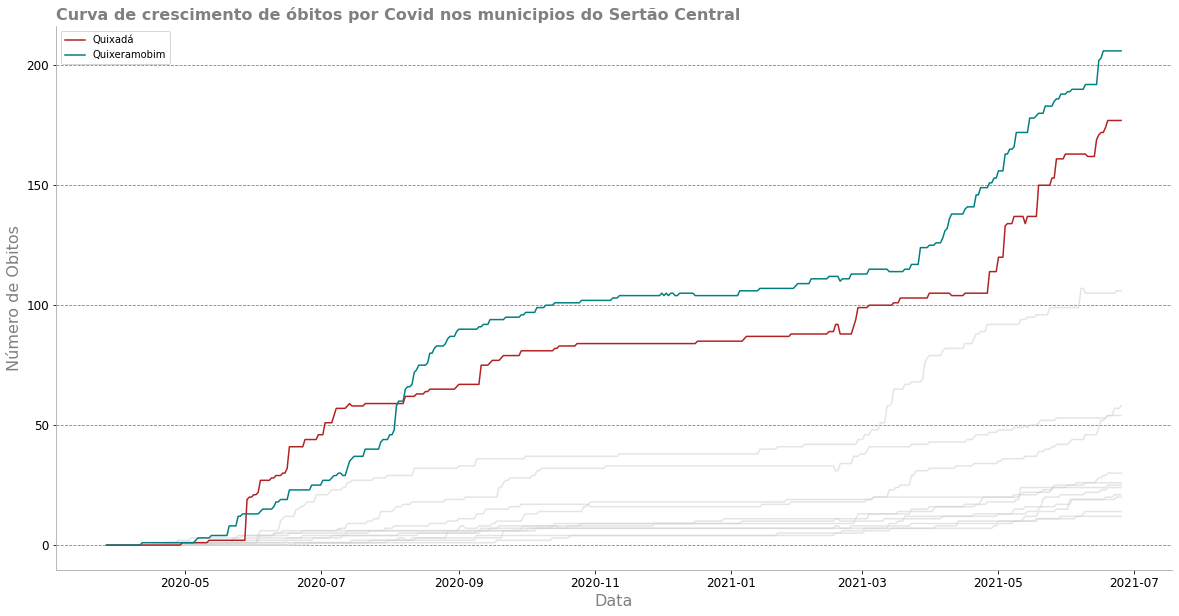

In [ ]:
for dados,cores in municipios.items():
  dataframe = filtra_MUN(sertao_central,dados)
  label = dados
  ax= sns.lineplot(x='data',y='obitosAcumulado',data=dataframe,color=cores, alpha=0.6)
ax=sns.lineplot(x='data',y='obitosAcumulado',data=filtra_MUN(sertao_central,'Quixadá'),color='firebrick',label='Quixadá')
ax=sns.lineplot(x='data',y='obitosAcumulado',data=filtra_MUN(sertao_central,'Quixeramobim'),color='teal',label='Quixeramobim')
plt.title('Curva de crescimento de óbitos por Covid nos municipios do Sertão Central', color='gray', fontsize=16, fontweight='bold',loc='left')
plt.ylabel('Número de Obitos', color='gray',fontsize=16)
plt.xlabel('Data', color='gray',fontsize=16)
plt.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax.legend(loc = 'best', fontsize=10)
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

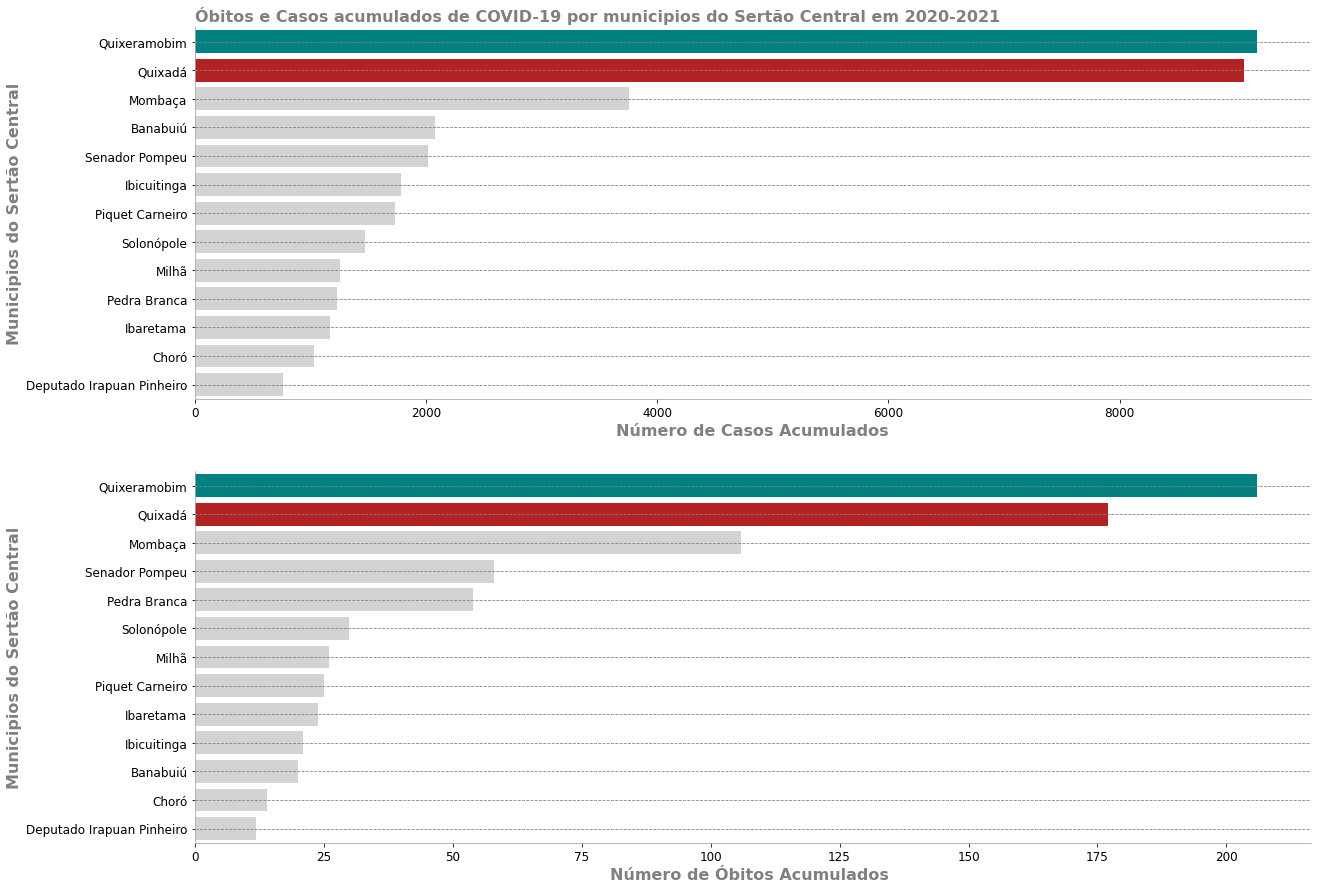

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

#Subplot 1
dataframe = filtra_MUN2(sertao_central) 
sns.barplot(data=dataframe.sort_values('casosNovos',ascending=False),x='casosNovos',y='municipio',palette=municipios2, ax=ax1, saturation=1)
#ax1.set_xlim(0,16000)
#Subplot 2
dataframe = filtra_MUN2(sertao_central) 
sns.barplot(data=dataframe.sort_values('obitosNovos',ascending=False),x='obitosNovos',y='municipio',palette=municipios2, ax=ax2,saturation=1)
#ax2.set_xlim(0,16000)

#Configurações subplot 1
ax1.set_ylabel('Municipios do Sertão Central', fontsize=16, fontweight='bold', color='grey')
ax1.set_xlabel('Número de Casos Acumulados', fontsize=16, fontweight='bold', color='grey')
ax1.set_title('Óbitos e Casos acumulados de COVID-19 por municipios do Sertão Central em 2020-2021',fontsize = 16,color='grey' ,fontweight = 'bold', loc='left')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#Configurações subplot2
ax2.set_ylabel('Municipios do Sertão Central', fontsize=16, fontweight='bold', color='grey')
ax2.set_xlabel('Número de Óbitos Acumulados ', fontsize=16, fontweight='bold', color='grey')
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax2.spines['bottom'].set_color('darkgrey')
ax2.spines['left'].set_color('darkgrey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.195)


plt.show()

Pelo que pode ser observado acima, analisando os dados relativos aos óbitos e casos nos municipios do Sertão Central, percebe-se que de fato a **Hipotese 1** e **3** estavam corretas. Contudo a Hipotese 2 é falsa, Quixeramobim se mostra mais prejudicado que quixadá.

Um dos possiveis motivos que explicaria esse grande número de casos e óbitos em Quixeramobim está relacionado com o registro de onde o caso e o óbito são feitos. Quixeramobim hoje abriga o Hospital Regional do Sertão Central, equipamento de saúde responsavel por atender toda a região.

Uma outra coisa que vale a pena observar é que as curvas municipais também seguem os períodos de datas dos picos encontrados nas regiões, vistas na [parte 2](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_2_.ipynb) desse projeto 

##4.2 Visualizando apenas Quxiadá e Quixeramobim

Utilizando a diferenciação é possivel alterar o coeficiente angular de uma reta, podemos usar o método `diff()` usado para calcular a diferença discreta entre os dados e aqui será usado para medir a taxa de crescimento e averiguar se ouve aumento ou diminuição da mesma

In [ ]:
#Taxa de crescimento casos
sertao_central['taxa_crescimento_casos'] = sertao_central['casosNovos'].diff()

#Taxa de crescimento óbitos
sertao_central['taxa_crescimento_obitos'] = sertao_central['obitosNovos'].diff()

#media_movel
sertao_central['media_movel_casos'] = sertao_central['casosNovos'].rolling(window=7,center=False).mean()

sertao_central['media_movel_obitos'] = sertao_central['obitosNovos'].rolling(window=7,center=False).mean()

**Taxa de Crescimento Casos e Óbitos**

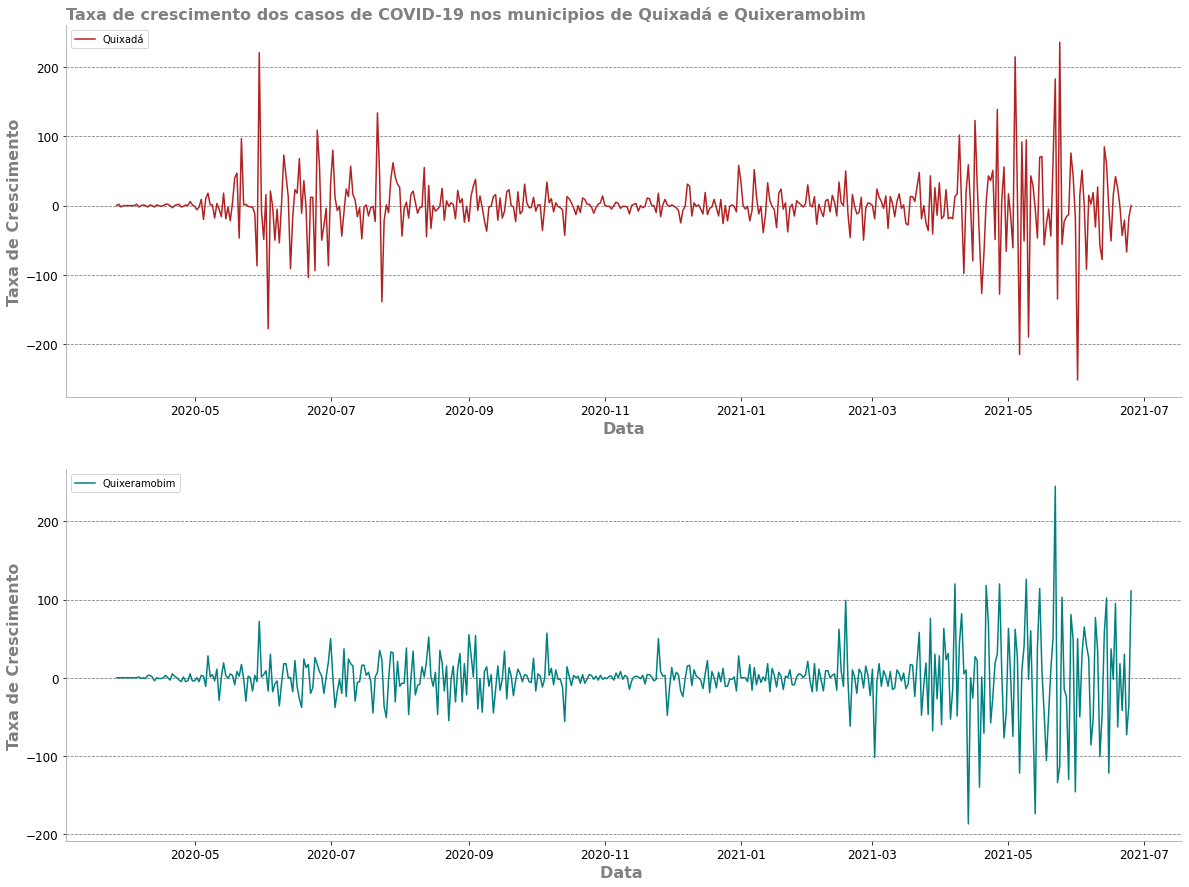

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

#Subplot 1
dataframe = filtra_MUN(sertao_central,'Quixadá') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_casos',x='data',color='firebrick', ax=ax1, label='Quixadá')
#ax1.set_xlim(0,16000)
#Subplot 2
dataframe = filtra_MUN(sertao_central,'Quixeramobim') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_casos',x='data',color='teal', ax=ax2,label='Quixeramobim')
#ax2.set_xlim(0,16000)

#Configurações subplot 1

ax1.set_ylabel('Taxa de Crescimento', fontsize=16, fontweight='bold', color='grey')
ax1.set_xlabel('Data', fontsize=16, fontweight='bold', color='grey')
ax1.set_title('Taxa de crescimento dos casos de COVID-19 nos municipios de Quixadá e Quixeramobim',fontsize = 16,color='grey' ,fontweight = 'bold', loc='left')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc = 'upper left', fontsize=10)

#Configurações subplot2
ax2.set_ylabel('Taxa de Crescimento', fontsize=16, fontweight='bold', color='grey')
ax2.set_xlabel('Data ', fontsize=16, fontweight='bold', color='grey')
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax2.spines['bottom'].set_color('darkgrey')
ax2.spines['left'].set_color('darkgrey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend(loc = 'upper left', fontsize=10)

plt.subplots_adjust(hspace=0.195)


plt.show()

**Em Quixadá**
* Nesse gráfico é posivel observar que existe uma maior taxa de crescimento ja na onda referente ao ano de 2020, superior incluisve aos dados de Quixeramobim, esse pico acompanha as datas percebidas na analise das regiões, tendo um grande crescimento em aproximadamente 2020-06. Em 2021, esse mesmo pico é percebido, aproximadamente a data corresponde 2021-04, quando a taxa cresce até o 2021-05 caindo bruscamente em algum período de 2021-06, mas logo em seguida voltando a crescer

**Em Quixeramobim**

* Nesse gráfico é posivel observar que existe uma maior taxa de crescimento na onda referente ao ano de 2021, aproximadamente a data corresponde 2021-04, quando a taxa cresce até o 2021-05 caindo em seguindo mas mantendo-se superior ao restante dos meses analisados 

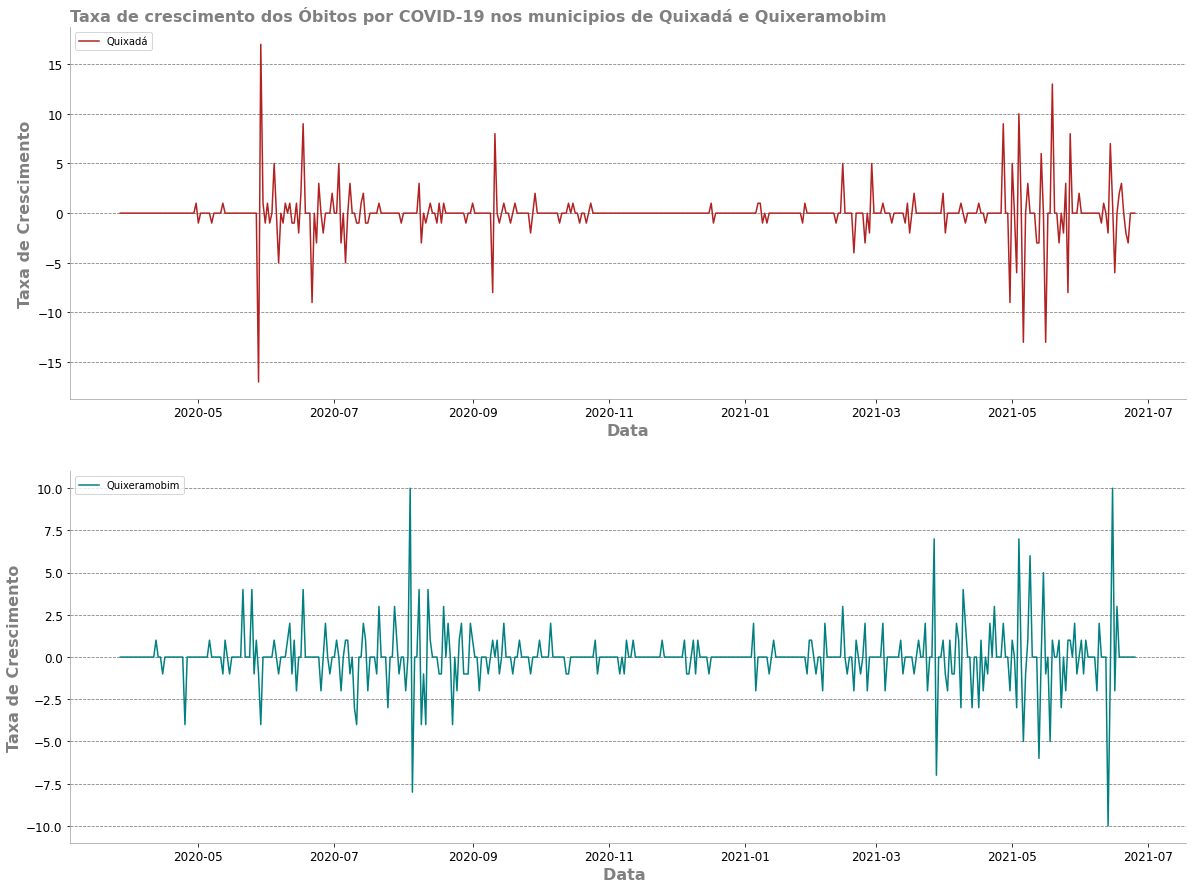

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

#Subplot 1
dataframe = filtra_MUN(sertao_central,'Quixadá') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_obitos',x='data',color='firebrick', ax=ax1, label='Quixadá')
#ax1.set_xlim(0,16000)
#Subplot 2
dataframe = filtra_MUN(sertao_central,'Quixeramobim') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_obitos',x='data',color='teal', ax=ax2,label='Quixeramobim')
#ax2.set_xlim(0,16000)

#Configurações subplot 1

ax1.set_ylabel('Taxa de Crescimento', fontsize=16, fontweight='bold', color='grey')
ax1.set_xlabel('Data', fontsize=16, fontweight='bold', color='grey')
ax1.set_title('Taxa de crescimento dos Óbitos por COVID-19 nos municipios de Quixadá e Quixeramobim',fontsize = 16,color='grey' ,fontweight = 'bold', loc='left')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc = 'upper left', fontsize=10)

#Configurações subplot2
ax2.set_ylabel('Taxa de Crescimento', fontsize=16, fontweight='bold', color='grey')
ax2.set_xlabel('Data ', fontsize=16, fontweight='bold', color='grey')
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax2.spines['bottom'].set_color('darkgrey')
ax2.spines['left'].set_color('darkgrey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend(loc = 'upper left', fontsize=10)
plt.subplots_adjust(hspace=0.195)


plt.show()

**Em Quixadá**
* Nesse gráfico é posivel observar que existe uma maior taxa de crescimento ja na onda referente ao ano de 2020, data que bate com a analise dos casos aproximadamente 2020-06, esse dado tem uma queda no mês posterior e em diante, voltando a crescer na data relativa a 2020-09. Em 2021, será percebido um pico expressivo em 2021-05 e 2021-06 contudo seus valores são inferiores ao do ano passado. Após esses dois meses tem uma queda e um leve cresciemento na data de 2020-06

**Em Quixeramobim**

* Nesse gráfico observa-se alguns picos expressivos ja entre as datas 2020-05 e 2020-07, contudo aproximadamente em 2020-08 tem um grande crescimento da taxa de óbitos, que vai se estabilizando ao longo do ano. Em 2021 entre as datas iniciais 2021-03 e 2021-05 observa-se picos bem expressivos da taxa de crescimento, mas ambos ineriores ao pico crescimento registrado em aproximadamente 2021-06
---



---


Analisando os dois gráfico acima é possivel enxergar uma temporalidade entre os picos de casos que é acompanhada também pelos óbitos. Uma boa analise é comprovar se existe uma correlação entre essas duas informações

### **4.2.1 Autocorrelação, Regressão Linear e Correlação Cruzada**

Nesse momento busca-se identificar a existência de uma relação entre duas informações, no caso, óbitos e casos novos. Alguns métodos permitem visualizar essa relação. A primeira é a regressão linear.

A regressão linear busca descrever a relação entre os dados apartir de uma reta, mas para se usar uma regressãoos, os dados (tirando a variável que se quer estimar) não devem estar correlacionados, e daí vem a importância do método.

Abaixo será plotada uma regressão linear perfeita

In [ ]:
df = pd.DataFrame({'eixo_x':np.linspace(1, 10, 10)})
df['eixo_y'] = df['eixo_x']*3 + 1

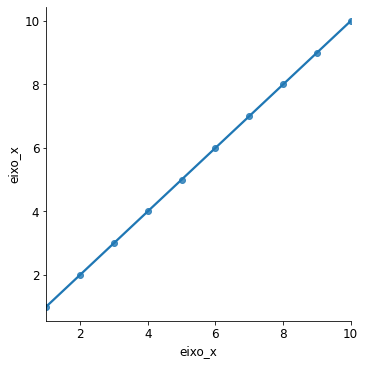

In [ ]:
sns.lmplot(x='eixo_x',y='eixo_x',data=df)

No gráfico acima é possivel observar uma dependência linear perfeita entre os dados, uma vez que eles encontram-se alinhados em um mesmo eixo, mostrando assim que um dado de certa forma 

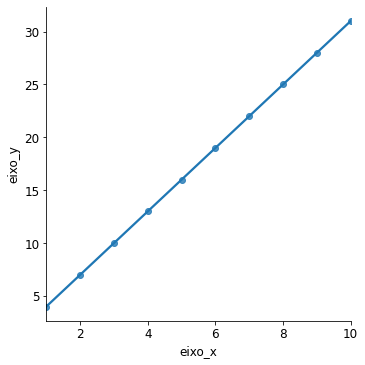

In [ ]:
sns.lmplot(x='eixo_x',y='eixo_y',data=df)

In [ ]:
df['eixo_y'] = df['eixo_x']*3 + 1

Agora calculando a regressão lienar para os casos e obitos novos através de um gráfico que utiliza função [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) da biblioteca `scipy` e do lmplot da biblioteca `seaborn`

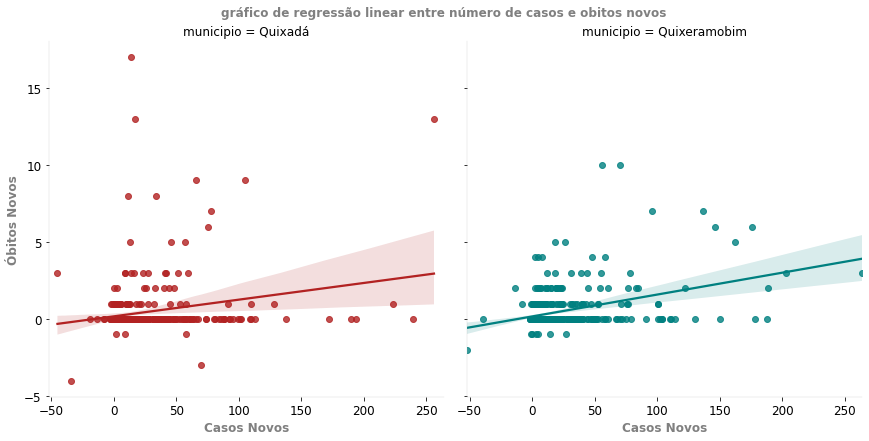

In [ ]:
dataframe=filtra_MUN3(sertao_central,'Quixadá','Quixeramobim')
#sns.set()
g = sns.lmplot(x='casosNovos', y='obitosNovos', data=dataframe, col='municipio', hue='municipio', 
               height=6, palette=["firebrick", "teal"])
result = linregress(dataframe['casosNovos'], dataframe['obitosNovos'])
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('gráfico de regressão linear entre número de casos e obitos novos',fontsize=12, fontweight='bold', color='grey')
g.set_axis_labels('Casos Novos','Óbitos Novos', fontsize=12, fontweight='bold', color='grey')
for ax in g.axes.flatten(): # Loop directly on the flattened axes 
    for _, spine in ax.spines.items():
        spine.set_color('darkgrey')
        spine.set_linewidth(0.2)

plt.show()

Aqui conseguimos observar pelo comportamento dos dados que a regressão talvez não se dê tão bem ou seja tão forte, para ambos os municipios.

Uma outra forma de averiguar se existe uma correlação entre os dados é o gráfico de correlaçãocruzada. A correlação cruzada é uma medida que busca mapear as movimentações dos dados em uma seríe temporal, mas considerando a relação entre eles. Atraves da corralação cruzada é possivel comparar séries temporas e determinar o quanto elas combinam entre si. Através da biblioteca `StatsModels`é possivel medir essa corralação entre **Casos e Óbitos** 

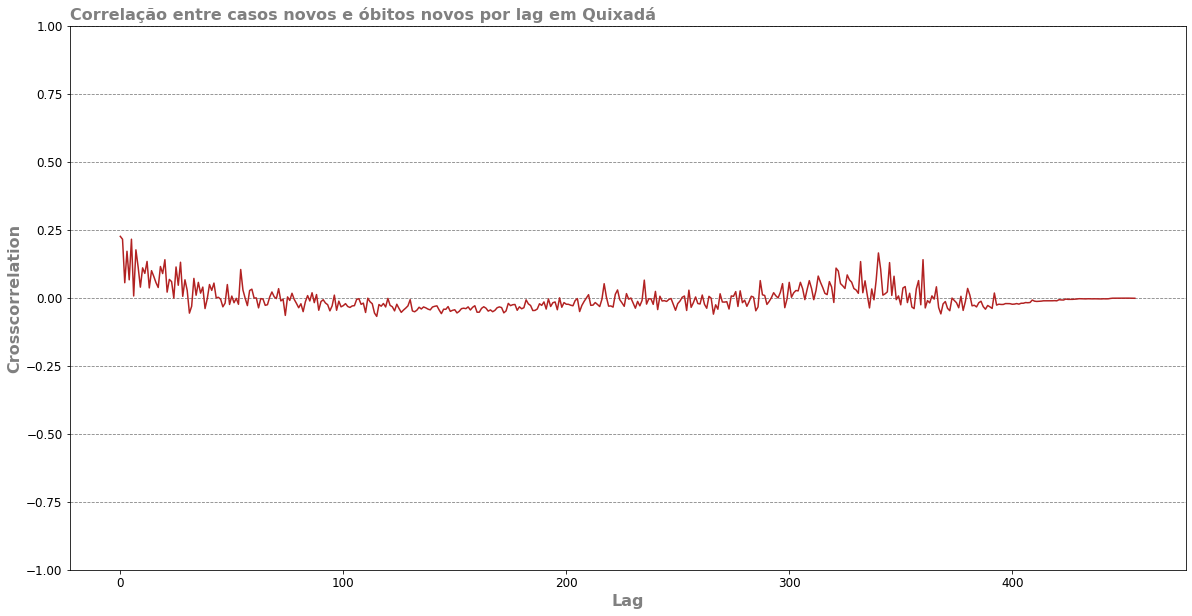

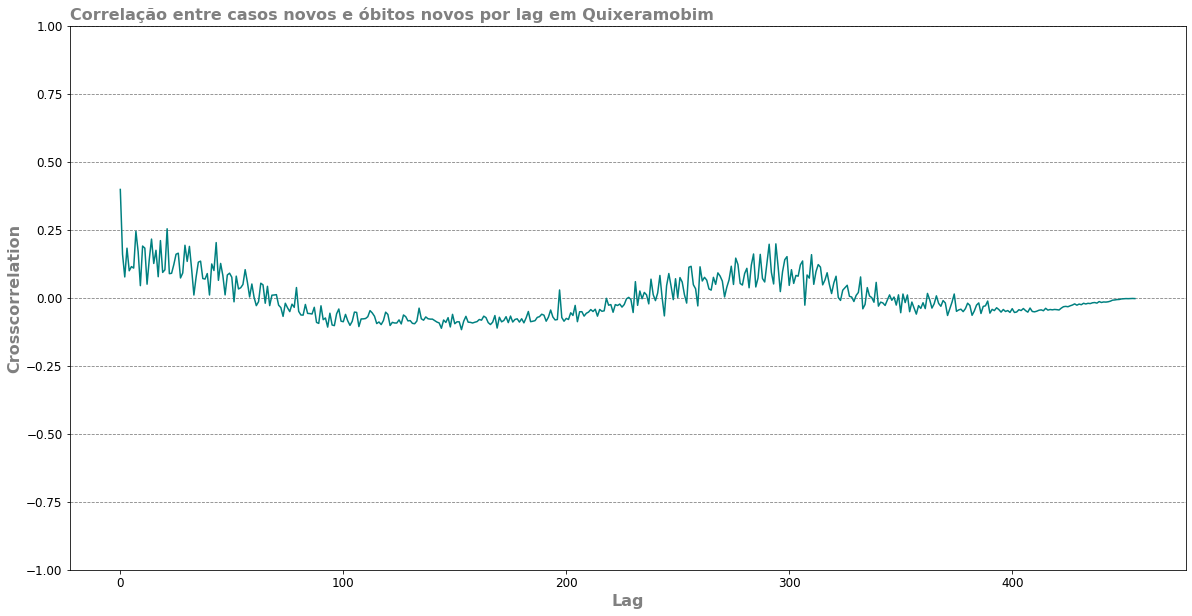

In [ ]:
cidades=['Quixadá','Quixeramobim']

for cidade in cidades:
  dataframe = filtra_MUN(sertao_central,cidade)
  ccf_output = smt.ccf(dataframe['casosNovos'],dataframe['obitosNovos'],unbiased=False) #dados de correlação
  x_lag = range(0,len(dataframe)) #lag
  if cidade == 'Quixadá':
    cor = 'firebrick'
  elif cidade == 'Quixeramobim':
    cor = 'Teal'
  plt.plot(x_lag, ccf_output, color = cor)
  plt.ylim(-1,1)
  plt.title(f'Correlação entre casos novos e óbitos novos por lag em {cidade}', weight='bold', fontsize=16, loc='left', color='gray')
  plt.xlabel('Lag', fontsize=16, fontweight='bold', color='grey')
  plt.ylabel('Crosscorrelation',fontsize=16, fontweight='bold', color='grey')
  plt.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
  plt.show()
  


Pelos gráficos acima realmente é possivel atestar uma correlação fraca entre os dados, todos se encontram a entre 0.25 e 0. Contudo no que se trata da sazonalidade, um hipotese a ser levantada é a respeito do desenho da curva.
Essa curva que se altera ao longo do lag até chegar a 0 de correlação, pode ser indicio de uma influência temporal. 

Testando essa hipotese:

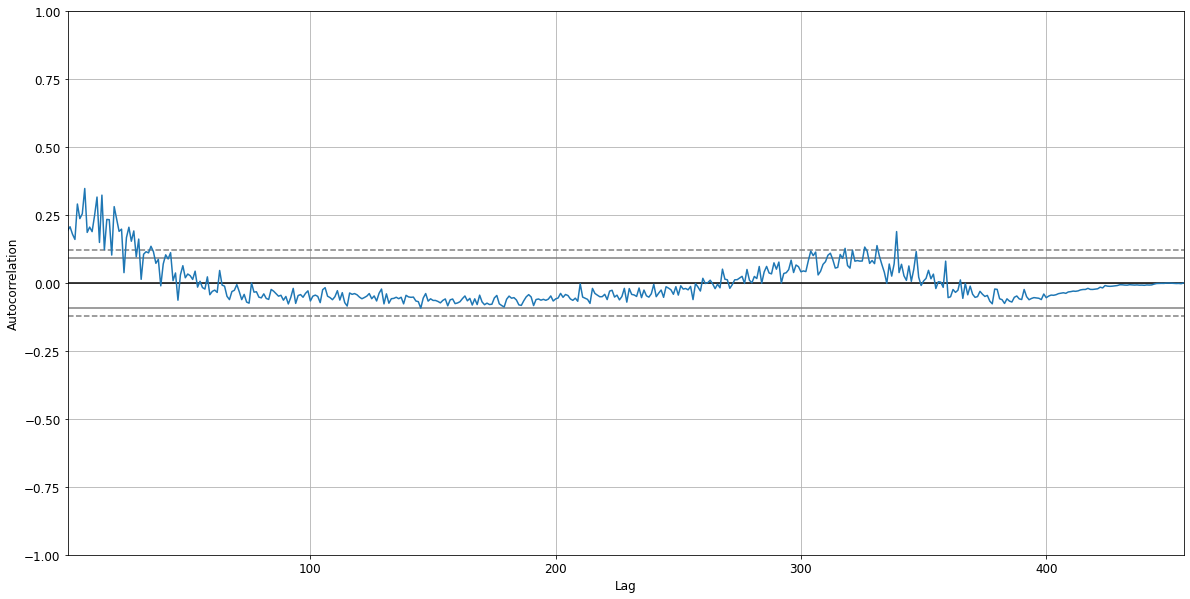

In [ ]:
dataframe=filtra_MUN(sertao_central,'Quixadá')
autocorrelation_plot(dataframe['casosNovos'])

Aqui procurou-se plotar uma autocorrelação do dado **casosNovos** por ela mesma e é possivel atestar uma  correlação entre os dados de 0.25 (o que é baixo), mas é importante notar que o mesmo desenho permanece o que demonstra uma depêndencia temporal dos dados.

Em gráficos onde não existe uma depêndencia temporal, chama-se de autocorrelação espúria.

Criando uma autocorrelação espúria

In [ ]:
dataframe.shape

(456, 12)

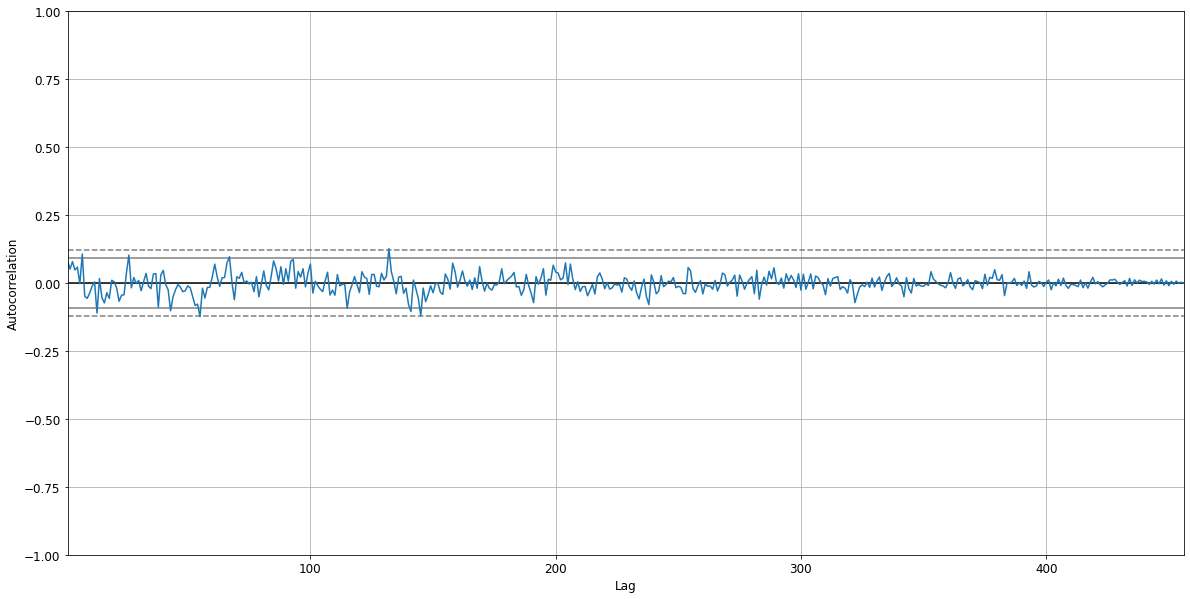

In [ ]:
aleatorio = np.random.rand(456)
autocorrelation_plot(aleatorio)

Esse gráfico de autocorrelação, possui todos os seus valores muito próximos de 0. O que em outras palavras é chamado de autocorrelação espúria e não representam nada de sazonalidade.

Os demais gráficos acima é possivel enxergar no próprio desenho da curva uma influência e dependência temporal entre as duas variáveis. A baixa correlação entre casos e óbitos também pode estar relacionado com a Sazonalidade dos dados uma vez que óbitos e casos não notificados no mesmo dia, além de considerar as ocorrências em feriados e finais de semana. Mais a frente será analizado e tratado melhor a questão da Sazonalidade dos dados, mas ja é possivel discutir um pouco mais sobre esse conceito, observando a Média móvel desses casos

### **4.2.3 Média móvel**

Utilizando a Média movel, é possivel avançar na analise feita acima, uma vez que ela suaviza os picos e nos mostra a tendência temporal das informações.

Uzar a janela de temporalidade de uma média de 7 dias diminui o efeito de Sazonalidade e mostra de maneira mais clara a tendência dos dados e não seu valor absoluto

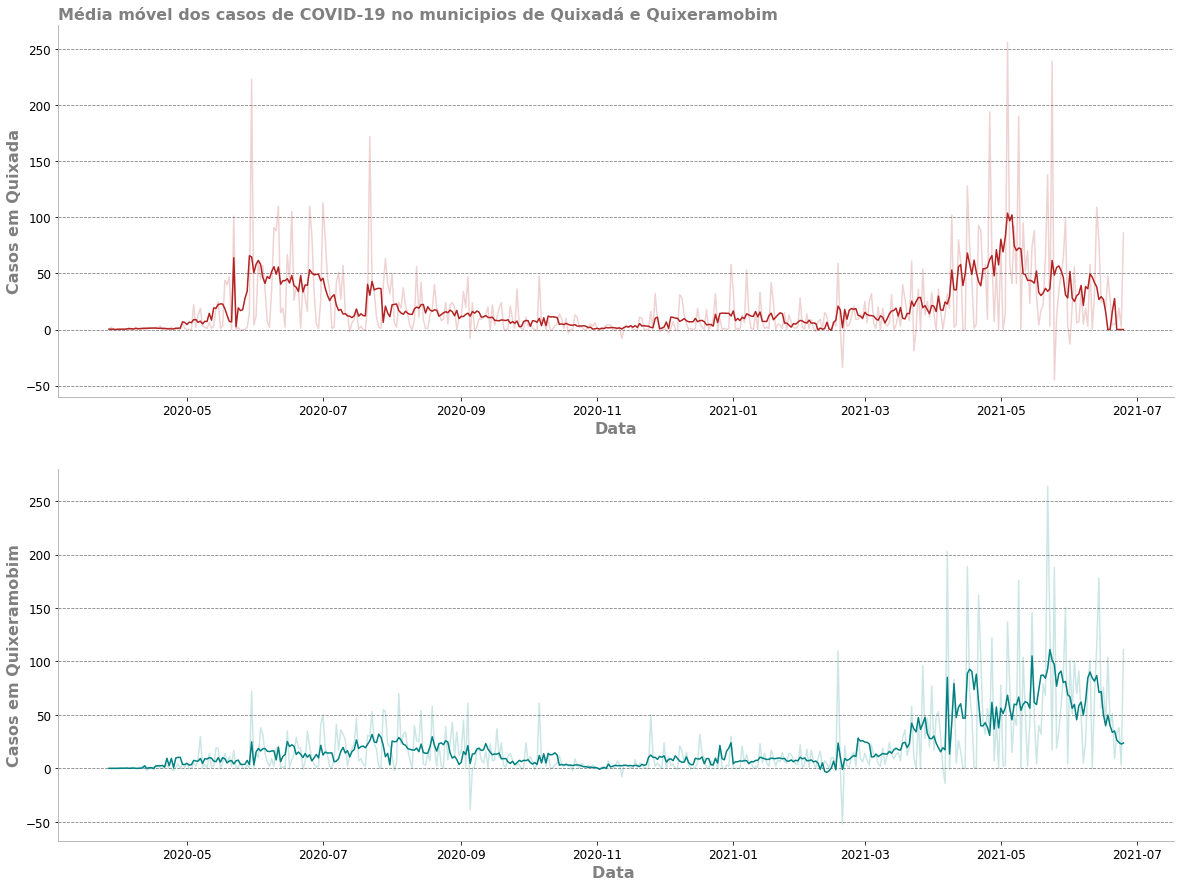

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

#Subplot 1
dataframe = filtra_MUN(sertao_central,'Quixadá') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='casosNovos',x='data',color='firebrick', ax=ax1, alpha=0.2)
sns.lineplot(x='data',y='media_movel_casos', data=dataframe, color='firebrick', ax=ax1)

#Subplot 2
dataframe = filtra_MUN(sertao_central,'Quixeramobim') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='casosNovos',x='data',color='teal', ax=ax2,alpha=0.2)
sns.lineplot(x='data',y='media_movel_casos', data=dataframe, color='teal', ax=ax2)


#Configurações subplot 1
ax1.set_ylabel('Casos em Quixada', fontsize=16, fontweight='bold', color='grey')
ax1.set_xlabel('Data', fontsize=16, fontweight='bold', color='grey')
ax1.set_title('Média móvel dos casos de COVID-19 no municipios de Quixadá e Quixeramobim',fontsize = 16,color='grey' ,fontweight = 'bold', loc='left')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#Configurações subplot2
ax2.set_ylabel('Casos em Quixeramobim', fontsize=16, fontweight='bold', color='grey')
ax2.set_xlabel('Data ', fontsize=16, fontweight='bold', color='grey')
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax2.spines['bottom'].set_color('darkgrey')
ax2.spines['left'].set_color('darkgrey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.195)


plt.show()

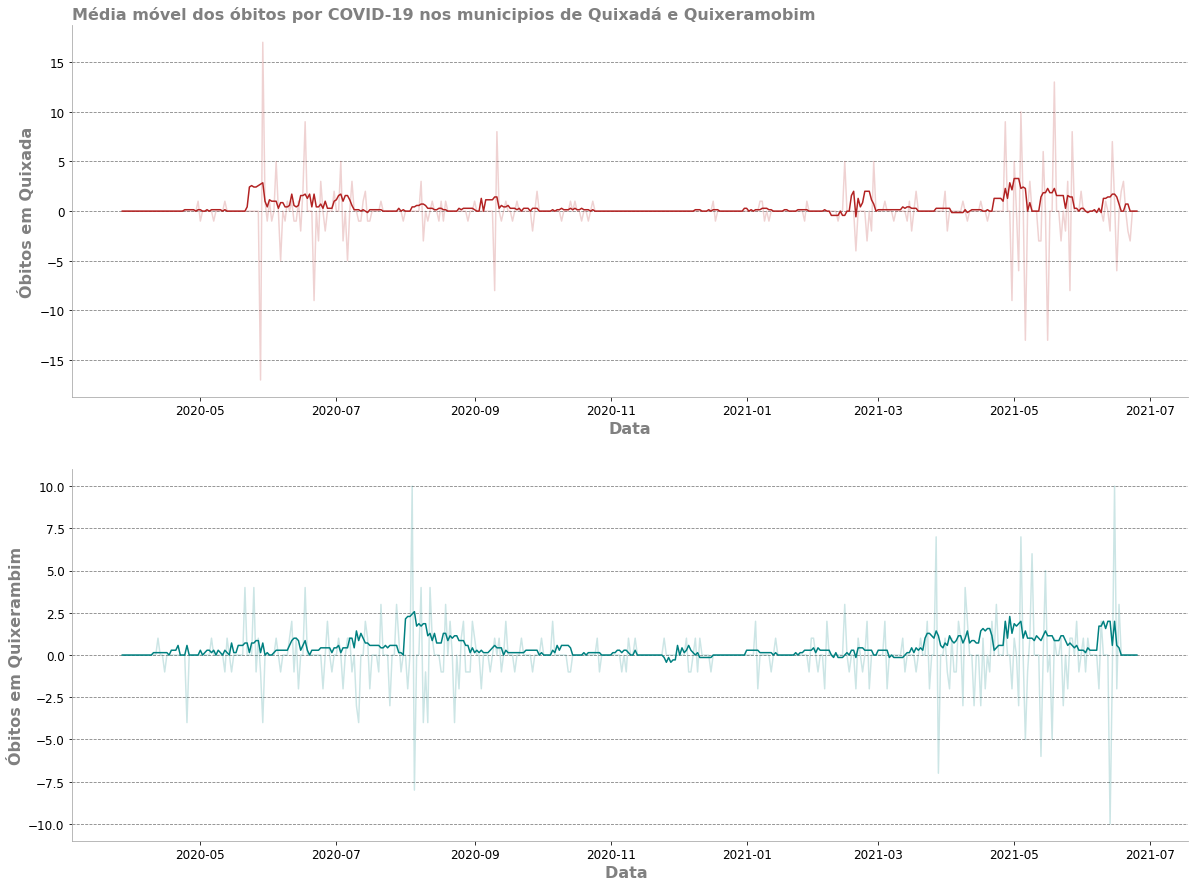

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

#Subplot 1
dataframe = filtra_MUN(sertao_central,'Quixadá') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_obitos',x='data',color='firebrick', ax=ax1, alpha=0.2)
sns.lineplot(x='data',y='media_movel_obitos', data=dataframe, color='firebrick', ax=ax1)

#Subplot 2
dataframe = filtra_MUN(sertao_central,'Quixeramobim') 
sns.lineplot(data=dataframe.sort_values('casosNovos',ascending=False),y='taxa_crescimento_obitos',x='data',color='teal', ax=ax2,alpha=0.2)
sns.lineplot(x='data',y='media_movel_obitos', data=dataframe, color='teal', ax=ax2)

#Configurações subplot 1

ax1.set_ylabel('Óbitos em Quixada', fontsize=16, fontweight='bold', color='grey')
ax1.set_xlabel('Data', fontsize=16, fontweight='bold', color='grey')
ax1.set_title('Média móvel dos óbitos por COVID-19 nos municipios de Quixadá e Quixeramobim',fontsize = 16,color='grey' ,fontweight = 'bold', loc='left')
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#Configurações subplot2
ax2.set_ylabel('Óbitos em Quixerambim', fontsize=16, fontweight='bold', color='grey')
ax2.set_xlabel('Data ', fontsize=16, fontweight='bold', color='grey')
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=0.8)
ax2.spines['bottom'].set_color('darkgrey')
ax2.spines['left'].set_color('darkgrey')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.195)


plt.show()

As datas de maior destaque ficaam para  os picos de 2020-05 - 2020-07 e 2021-03 - 2021-06. Como foi dito na [parte 2](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_2_.ipynb) desse projeto, essas datas refletem o pico de contaminações e os momentos em que o Ceará se torna o terceiro estado com maior número de contaminações de covid-19 no Brasil. Ja as datas de 2021 se rebatem nos picos avistados nas análises das regiões e vai de encontro com a noticia de que nesse período nota-se um novo crescimento de casos nas regiões do estado do Ceará.

Dito isso é possivel confirmar a **Hipótese 4**

## 4.3 Visuzalizando Série temporal

Quando estamos fazendo um modelo de predição de dados desconhecidos, estamos abastecendo esse modelo com dados fornecidos e conhecidos, significa que a maquina estará se baseando e assumindo tendências e organizações de dados conhecidos.

Então NÃO pode esperar que o modelo irá predizer algo que está fora do padrão que ele encontra nos dados. Ele usa o passado para predizer o futuro. Como dito anteriormente deve-se passar algumas informações para o Prophet são elas:

* df_treino[y][:periodo]: Dataframe contendo os dados de treino

* df_treino['ds']: As datas que serão analisadas junto aos dados

* df_teste[y][periodo:]: Dataframe contendo os dados de teste

* df_teste['ds']: As datas que serão analisadas junto aos dados

Nesse projeto busca-se obter os dados de treino e teste sobre os casos novos nos municipios de Quixadá e Quixeramobim.Será destinado 70% dos dados para o treino e 30% para os dados de teste. Podemos calcular isso a partir do tamanho do nosso dataframe analisado 


In [ ]:
dados_quixada = dados_CE.query('municipio =="Quixadá"')
dados_quixeramobim = dados_CE.query('municipio == "Quixeramobim" ')



In [ ]:
dados_quixada.shape

(456, 11)

In [ ]:
display(dados_quixada.head())
display(dados_quixeramobim.head())

index municipio  coduf  ...  obitosAcumulado obitosNovos          regiao
18796  137139   Quixadá     23  ...                0           0  Sertão Central
18797  137140   Quixadá     23  ...                0           0  Sertão Central
18798  137141   Quixadá     23  ...                0           0  Sertão Central
18799  137142   Quixadá     23  ...                0           0  Sertão Central
18800  137143   Quixadá     23  ...                0           0  Sertão Central

[5 rows x 11 columns]

index     municipio  ...  obitosNovos          regiao
19050  137393  Quixeramobim  ...            0  Sertão Central
19051  137394  Quixeramobim  ...            0  Sertão Central
19052  137395  Quixeramobim  ...            0  Sertão Central
19053  137396  Quixeramobim  ...            0  Sertão Central
19054  137397  Quixeramobim  ...            0  Sertão Central

[5 rows x 11 columns]

**Criando os dados de treino e teste**

In [ ]:
quixada_treino = pd.DataFrame()
quixada_teste = pd.DataFrame()

quixada_treino['ds'] = dados_quixada['data'][:400]
quixada_treino['y'] = dados_quixada['casosNovos'][:400]
quixada_treino['ds'] = pd.to_datetime(quixada_treino['ds'],format='%Y-%m-%d')

quixada_teste['ds'] = dados_quixada['data'][400:]
quixada_teste['y_teste'] = dados_quixada['casosNovos'][400:]
quixada_teste['ds'] = pd.to_datetime(quixada_teste['ds'],format='%Y-%m-%d')

quixeramobim_treino = pd.DataFrame()
quixeramobim_teste = pd.DataFrame()

quixeramobim_treino['ds'] = dados_quixeramobim['data'][:400]
quixeramobim_treino['y'] = dados_quixeramobim['casosNovos'][:400]
quixeramobim_treino['ds'] = pd.to_datetime(quixeramobim_treino['ds'],format='%Y-%m-%d')

quixeramobim_teste['ds'] = dados_quixeramobim['data'][400:]
quixeramobim_teste['y_teste'] = dados_quixeramobim['casosNovos'][400:]
quixeramobim_teste['ds'] = pd.to_datetime(quixeramobim_teste['ds'],format='%Y-%m-%d')


In [ ]:
quixada_treino

ds    y
18796 2020-03-27    0
18797 2020-03-28    2
18798 2020-03-29    0
18799 2020-03-30    0
18800 2020-03-31    0
...          ...  ...
77683 2021-04-26  194
77684 2021-04-27   66
77685 2021-04-28    7
77686 2021-04-29   55
77687 2021-04-30    0

[400 rows x 2 columns]

**Plotando as previsões de Quixadá** 

Foi criado um função chamada `plota1` que permitissse o modelo realizasse previsões em algumas janelas de tempo, a fim de encontrar posteriormente o período que melhor satisfaça o projeto.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

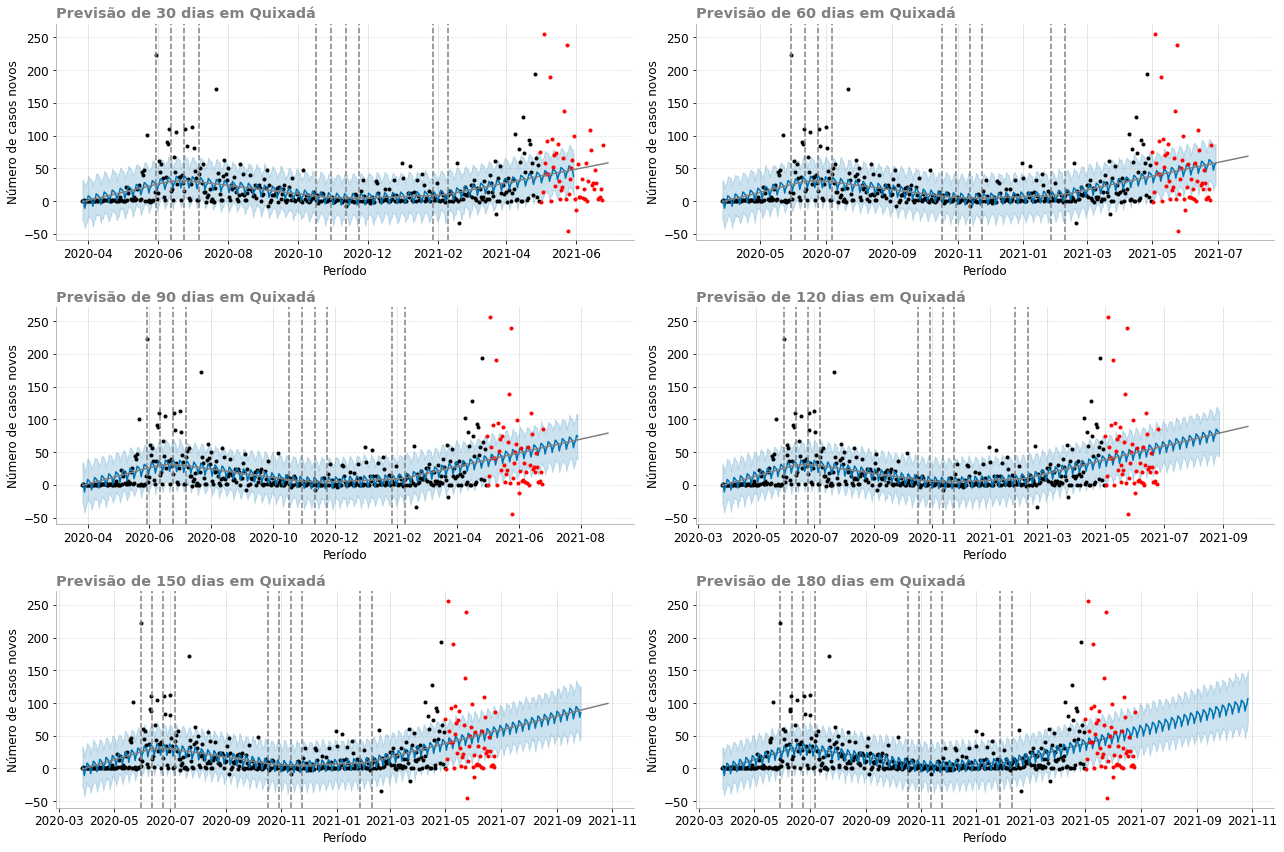

In [ ]:
plota1(quixada_treino,quixada_teste,'Quixadá')

**Plotando as previsões de Quixeramobim**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

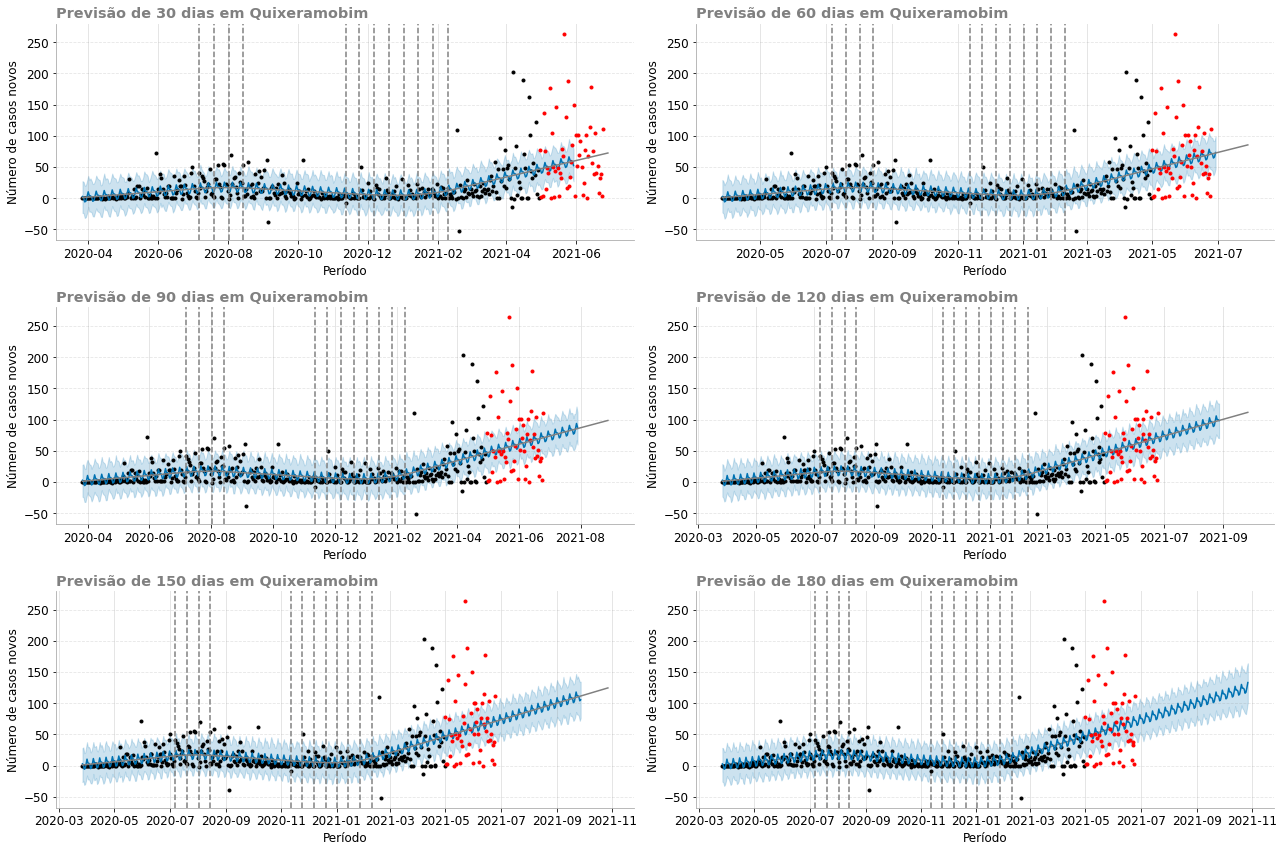

In [ ]:
plota1(quixeramobim_treino,quixeramobim_teste,'Quixeramobim')

Analisando nossos gráficos temos:

* uma curva azul central que representa  tendência dos dados
* Uma mancha azul, que corresponde ao intervalo de confiança
* pontos pretos e vermelhos:
  * pretos = dados de treino
  * vermelhos = dados de teste
* linhas pontilhadas em cinza: Changepoints. 

Os Changepoints podem ser definidos como os pontos de tendências de uma série temporal. O Prophet trabalha com um crescimento por padrão linear, o que significa que ele busca ajustar uma reta linear a dados que foram informados. Em determinados momentos desse modelo o Prophet percebe que existem entre os dados pontos que mudam a tendência por isso ele altera a linha aos changepoints. O exemplo abaico exemplifica como essa reta se altera aos pontos de mudança na tendência.

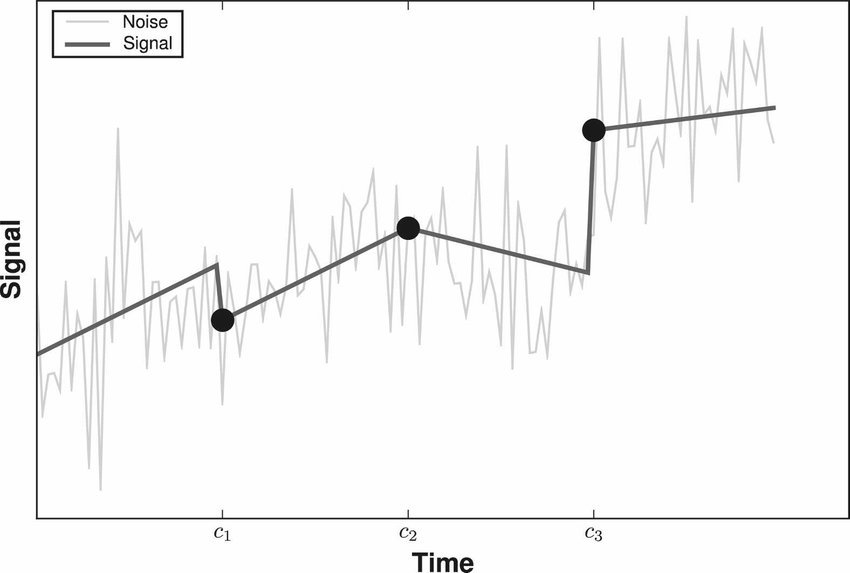

A tendência numa série temporal é um padrão que um conjunto de dados, é extremamente importante que essa tendência seja representada assim como seus pontos de mudança, para esse modelo foi considerado como ponto de mudança na tendência as datas do conjunto de dados que ocorriam essa mudança.

Através da função Esthimator, o Prophet encontrou as datas que fugiram da tendência e utilizou elas como os changepoints

>>*estimator = Prophet()
>>estimator.fit(df_treino)
>>datas = df_treino.loc[df_treino['ds'].isin  (estimator.changepoints)] 
>>datas = datas['ds'].tolist()*

Notou-se ja aqui nesse primeiro ajuste que com o passar dos dias  aproximadamente após os 90 dias, foi se tornando dificil para o modelo realizar as previsões. Contudo até aqui não foi adicionado uma informação importante, os feriados 

**Adicionando os feriados ao modelo:**

Em resumo foram repassados os seguintes feriados ao modelo:

* Feriados Nacionais

* Feriados Municipais

* Foram excluidos os feriados que passaram a ser ponto facultativo

In [ ]:
feriados_quixada_2020=[
'2020-01-01',                       
'2020-02-11',
'2020-02-25',
'2020-03-19',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-09-07',
'2020-10-12',
'2020-10-27',
'2020-11-15',
'2020-12-25']

feriados_quixada_2021=[
'2021-01-01',                       
'2021-02-11',
'2021-03-25',
'2021-04-02',
'2021-04-04',
'2021-04-21',
'2021-05-01',
'2021-05-09']

feriados_quixeramobim_2020=[
'2020-01-01',                       
'2020-03-25',
'2020-04-10',
'2020-04-15',
'2020-04-21',
'2020-05-01',
'2020-06-13',
'2020-08-14',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25']

feriados_quixeramobim_2021=[
'2021-01-01',                       
'2021-03-25',
'2021-04-02',
'2021-04-21',
'2021-05-01']


#Quixada
feriados_quixada_2020 = pd.DataFrame({'holiday':'quixada_2020',
                                 'ds':pd.to_datetime(feriados_quixada_2020)})
feriados_quixada_2021=pd.DataFrame({'holiday':'quixada_2021',
                               'ds':pd.to_datetime(feriados_quixada_2021)})

feriados_quixada = pd.concat((feriados_quixada_2020,feriados_quixada_2021))

#Quixeramobim
feriados_quixeramobim_2020 = pd.DataFrame({'holiday':'quixada_2020',
                                 'ds':pd.to_datetime(feriados_quixeramobim_2020)})
feriados_quixeramobim_2021=pd.DataFrame({'holiday':'quixada_2021',
                               'ds':pd.to_datetime(feriados_quixeramobim_2021)})

feriados_quixeramobim = pd.concat((feriados_quixeramobim_2020,feriados_quixeramobim_2021))


Antes de plotarmos os gráficos vamos comparar em cada modelo qual o melhor tipo de sazonalidade. 

Existem dois tipos de Sazonalidade:
**Explicativa** e **Mutiplicativa**. A primeira refere-se a uma série que apresenta flutuações sazonais mais  ou menos constantes, enquanto a segunda essas flutuações tendem a variar dependendo da série

Através de métricas é possivel comparar qual tipo de sazonalidade se adequa melhor ao modelo de predição. Serão feito teste de sazonalidade e posteriormente utilizada agora as metricas da biblioteca `Sckitlearn` para comparar qual o melhor tipo se adequa ao modelo.

---



---



**As métricas utilizadas para o teste foram:**

* **Mean Absolute Error**: A função calcula o erro absoluto médio, uma métrica de risco que corresponde ao valor esperado pela perda de erro absoluto. Quanto mais próxima de zero for o erro absoluto médio, melhor 

* **Meadian Absolute Error**: A função cacula a perca atrávez da mediana de todas as diferenças absolutas entre o modelo e a previsão. Trata-sem de um valor não negativo, nesse caso também o melhor valor é o que mais se aproxima de zero

* **r2_score**: A função calcula o coeficiente de terminação, comumente descrito como R². Ele representa a proporção da variância (de Y). O melhor valor possivel de ser retornado é 1 e ele pode ser negativo, uma vez que o modelo pode ser arbitrariamente pior




In [ ]:
estimator = Prophet()
estimator.fit(quixada_treino)
datas = quixada_treino.loc[quixada_treino['ds'].isin(estimator.changepoints)]
datas = datas['ds'].tolist()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Sazonalidade em Quixadá**

In [ ]:
#Quixadá Aditiva
modelo = Prophet(changepoint_prior_scale=0.1,changepoint_range=0.90 ,changepoints=datas, holidays=feriados_quixada,seasonality_mode='additive',weekly_seasonality=7)
modelo.fit(quixada_treino)
previsao1 = modelo.predict(modelo.make_future_dataframe(periods=0))

#Quixadá Explicativa
modelo = Prophet(changepoint_prior_scale=10,changepoint_range=0.90 ,changepoints=datas, holidays=feriados_quixada,seasonality_mode='multiplicative',weekly_seasonality=7)
modelo.fit(quixada_treino)
previsao2 = modelo.predict(modelo.make_future_dataframe(periods=0))


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Aditiva**

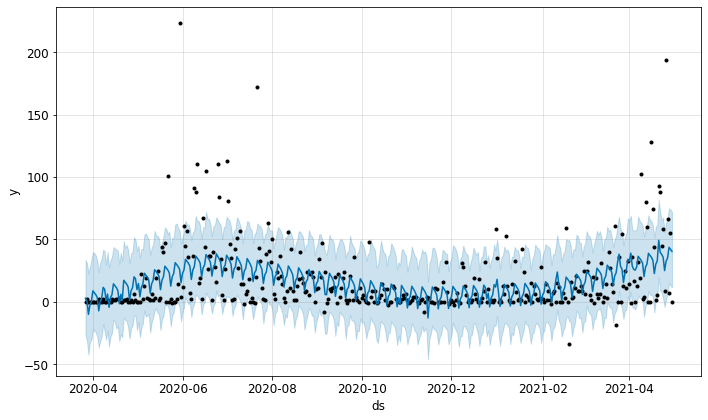

In [ ]:
fig = modelo.plot(previsao1, figsize=(10,6));

**Mutiplicativa**

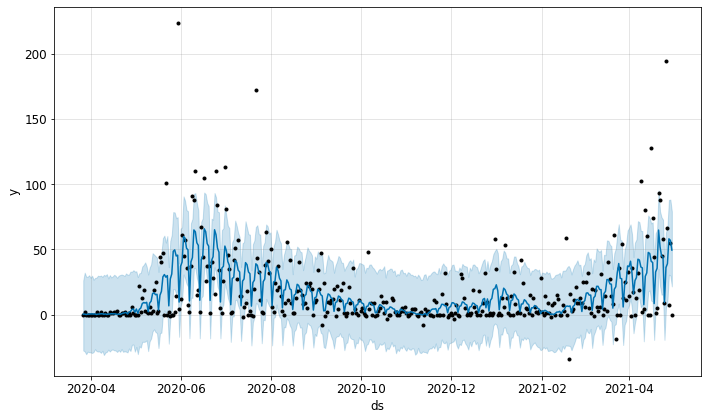

In [ ]:
fig = modelo.plot(previsao2, figsize=(10,6));

**Usando as métricas para Quixadá**

In [ ]:
#aditiva
display(metrics.mean_absolute_error(quixada_treino['y'],previsao1['yhat'][:400])) #comparando os pontos pretos com a linha azul
#mutiplicativa
display(metrics.mean_absolute_error(quixada_treino['y'],previsao2['yhat'][:400])) #comparando os pontos pretos com a linha azul

14.48002152478821

12.843269032503187

In [ ]:
#aditiva
display(metrics.median_absolute_error(quixada_treino['y'],previsao1['yhat'][:400]))
#mutiplicativa
display(metrics.median_absolute_error(quixada_treino['y'],previsao2['yhat'][:400]))

9.724142396555765

6.620332206828779

In [ ]:
#aditiva
display(metrics.r2_score(quixada_treino['y'],previsao1['yhat'][:400]))
#mutiplicativa
display(metrics.r2_score(quixada_treino['y'],previsao2['yhat'][:400]))

0.24971161371318873

0.33738657241740355

**Sazonalidade em Quixeramobim**

In [ ]:
#Quixeramobim Aditiva
modelo = Prophet(changepoint_prior_scale=0.1,changepoint_range=0.90 ,changepoints=datas, holidays=feriados_quixeramobim,seasonality_mode='additive',weekly_seasonality=7)
modelo.fit(quixeramobim_treino)
previsao3 = modelo.predict(modelo.make_future_dataframe(periods=0))

#Quixeramobim Explicativa
modelo = Prophet(changepoint_prior_scale=0.1,changepoint_range=0.90 ,changepoints=datas, holidays=feriados_quixeramobim,seasonality_mode='multiplicative',weekly_seasonality=7)
modelo.fit(quixeramobim_treino)
previsao4 = modelo.predict(modelo.make_future_dataframe(periods=0))


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Aditiva**

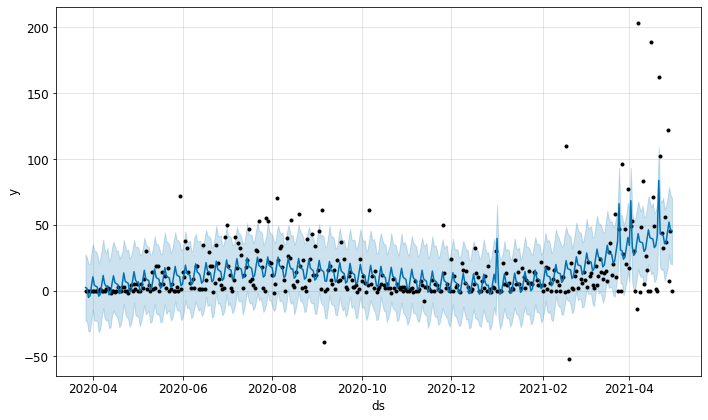

In [ ]:
fig = modelo.plot(previsao3, figsize=(10,6));

**Mutiplicativa**

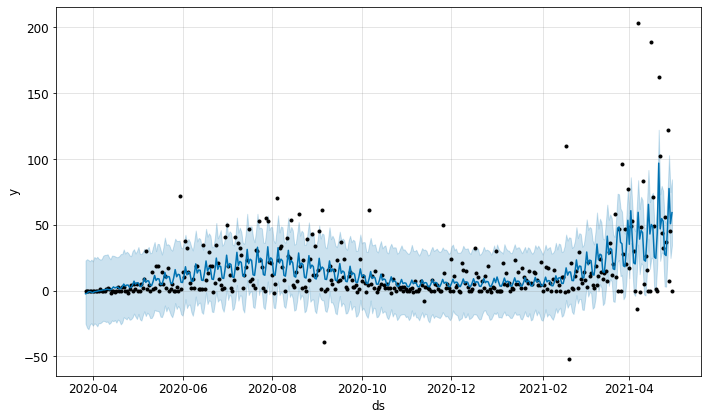

In [ ]:
fig = modelo.plot(previsao4, figsize=(10,6));

**Usando as métricas para Quixeramobim**

In [ ]:
#aditiva
display(metrics.mean_absolute_error(quixeramobim_treino['y'],previsao3['yhat'][:400])) #comparando os pontos pretos com a linha azul
#mutiplicativa
display(metrics.mean_absolute_error(quixeramobim_treino['y'],previsao4['yhat'][:400])) #comparando os pontos pretos com a linha azul

11.654506510032128

11.038299639648905

In [ ]:
#aditiva
display(metrics.median_absolute_error(quixeramobim_treino['y'],previsao3['yhat'][:400]))
#mutiplicativa
display(metrics.median_absolute_error(quixeramobim_treino['y'],previsao4['yhat'][:400]))

7.0547429981894165

5.976236937978129

In [ ]:
#aditiva
display(metrics.r2_score(quixeramobim_treino['y'],previsao3['yhat'][:400]))
#mutiplicativa
display(metrics.r2_score(quixeramobim_treino['y'],previsao4['yhat'][:400]))

0.2893318730468567

0.3319588723829363

**Conclusão**

Em todos os modelos de previsão a sazonalidade multiplicativa foi melhor. Essa será a utilizada de agora em diante

Agora é hora de encarar como se comparta o modelo com as alterações adicionadas de feriados e sazonalidade

**Plotando os Modelos com os feriados e sazonalidade mutiplicativa**

**Quixadá**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

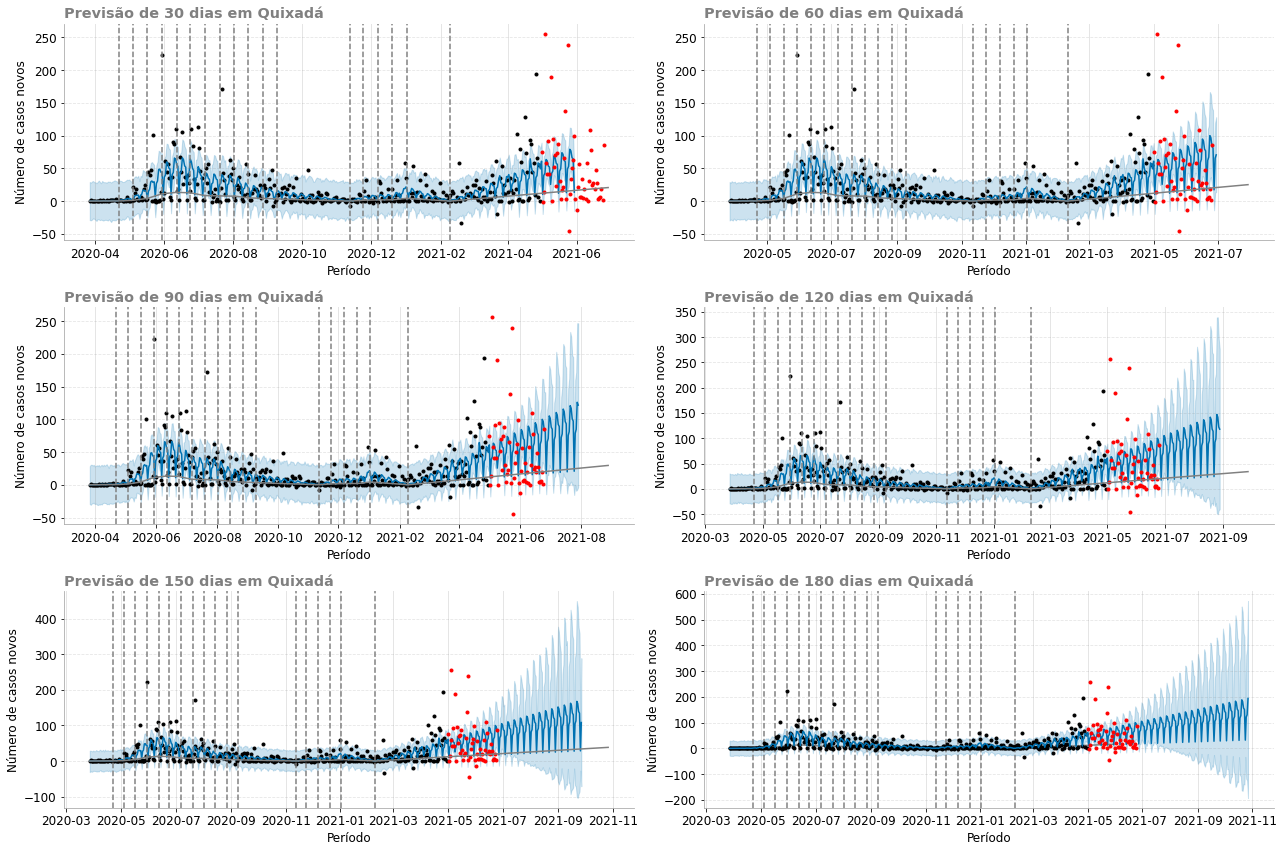

In [ ]:
plota2(quixada_treino,quixada_teste,'Quixadá', feriados_quixada)

**Quixeramobim**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

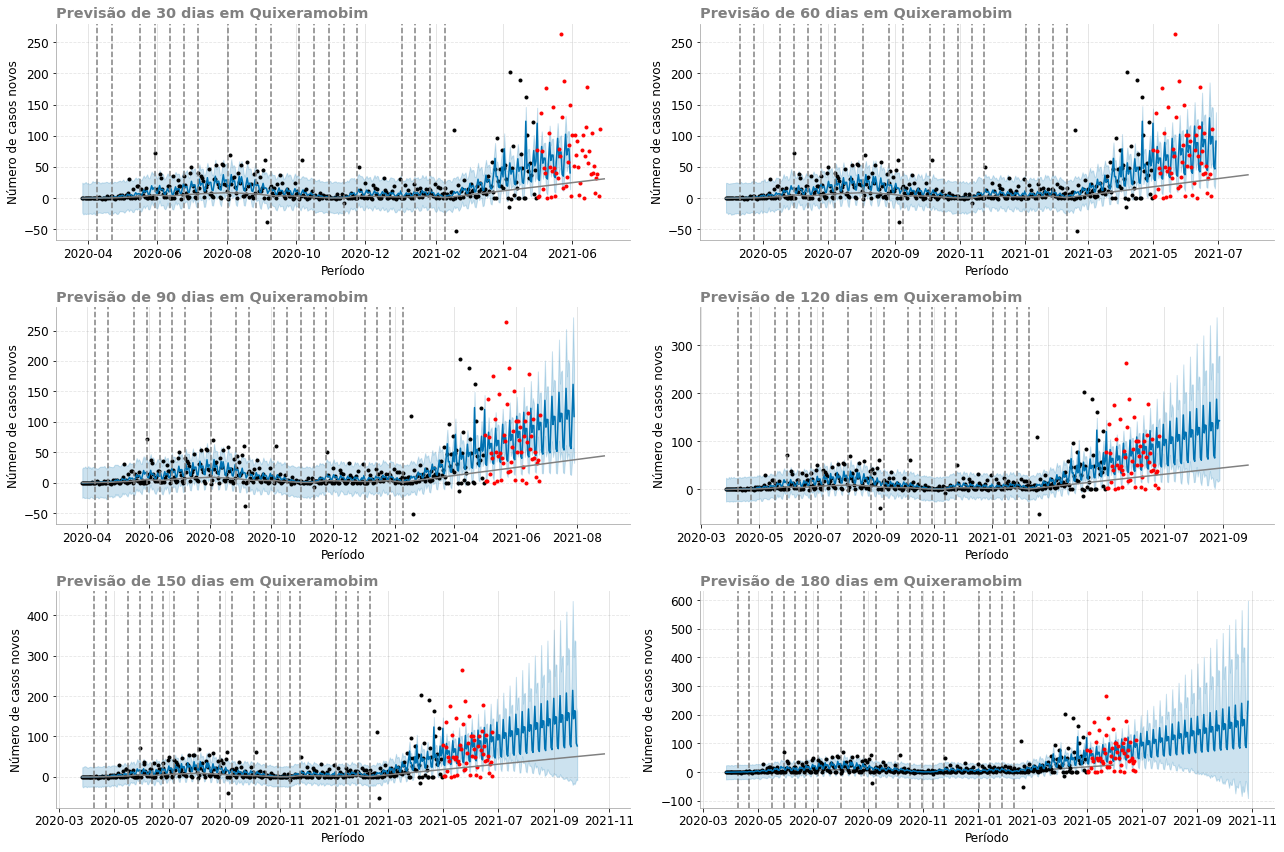

In [ ]:
plota2(quixeramobim_treino,quixeramobim_teste,'Quixeramobim', feriados_quixeramobim)

Tanto Quixadá, quando Quixeramobim tiveram suas previsões a partir de 90 dias em diante, prejudicadas(Quixadá até conseguiu performar melhor com os 120 dias, mas bem aquém das janelas temporais passadas). Portanto será utilizado aqui apenas as três primeiras janelas de tempo a partir de agora.

---
--- 

Antes proseguir com as alterações do modelo, vale a pena plotar os componentes de cada gráfico e ver como eles se comportam com as janelas temporais escolhidas


**Componentes do modelo - Quixadá**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


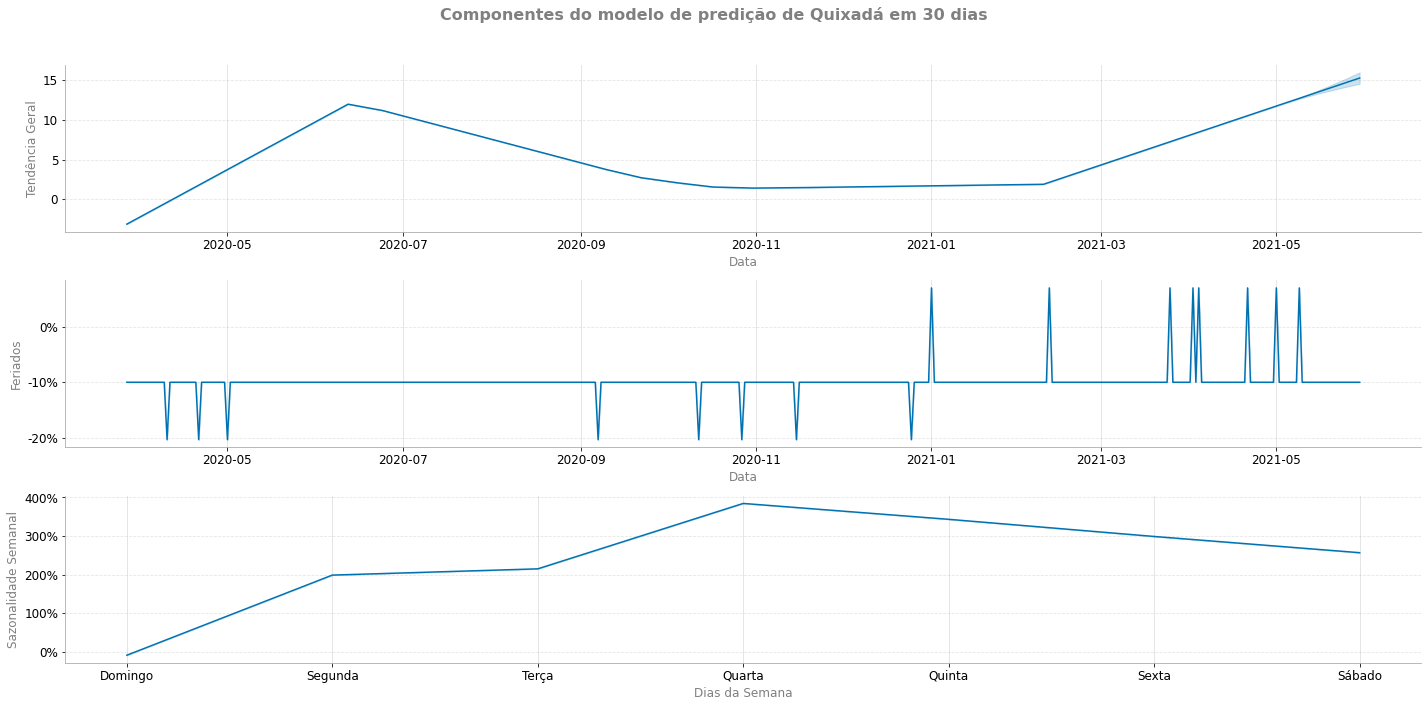

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


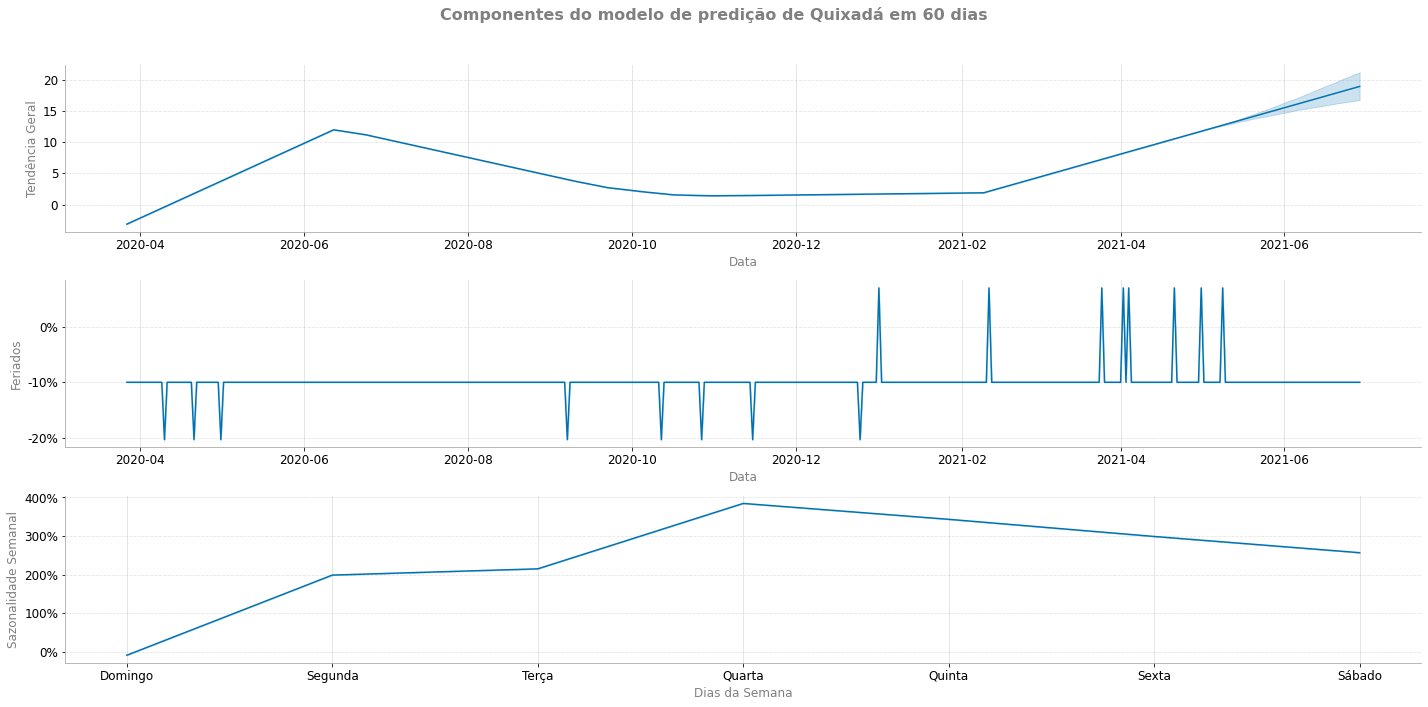

In [ ]:
plota_components(quixada_treino,quixada_teste,'Quixadá', feriados_quixada)

**Componentes do modelo - Quixeramobim**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


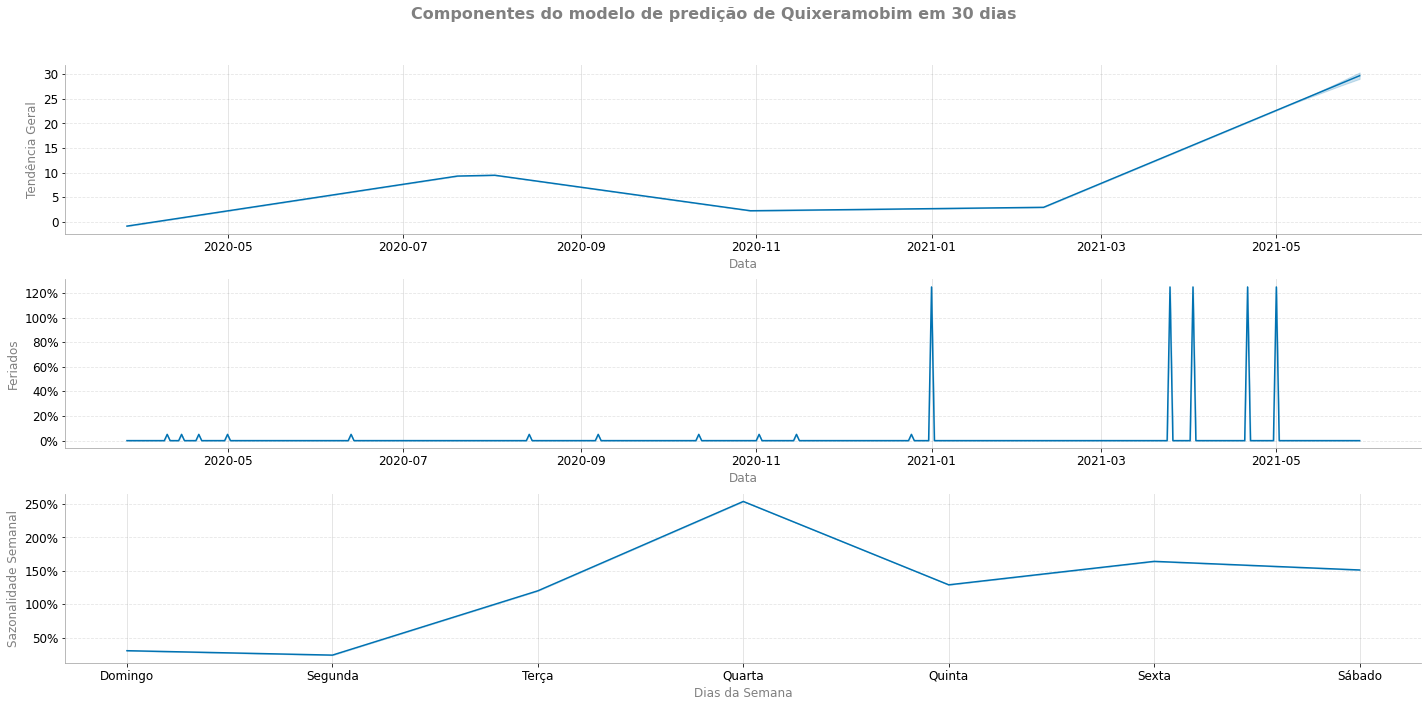

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


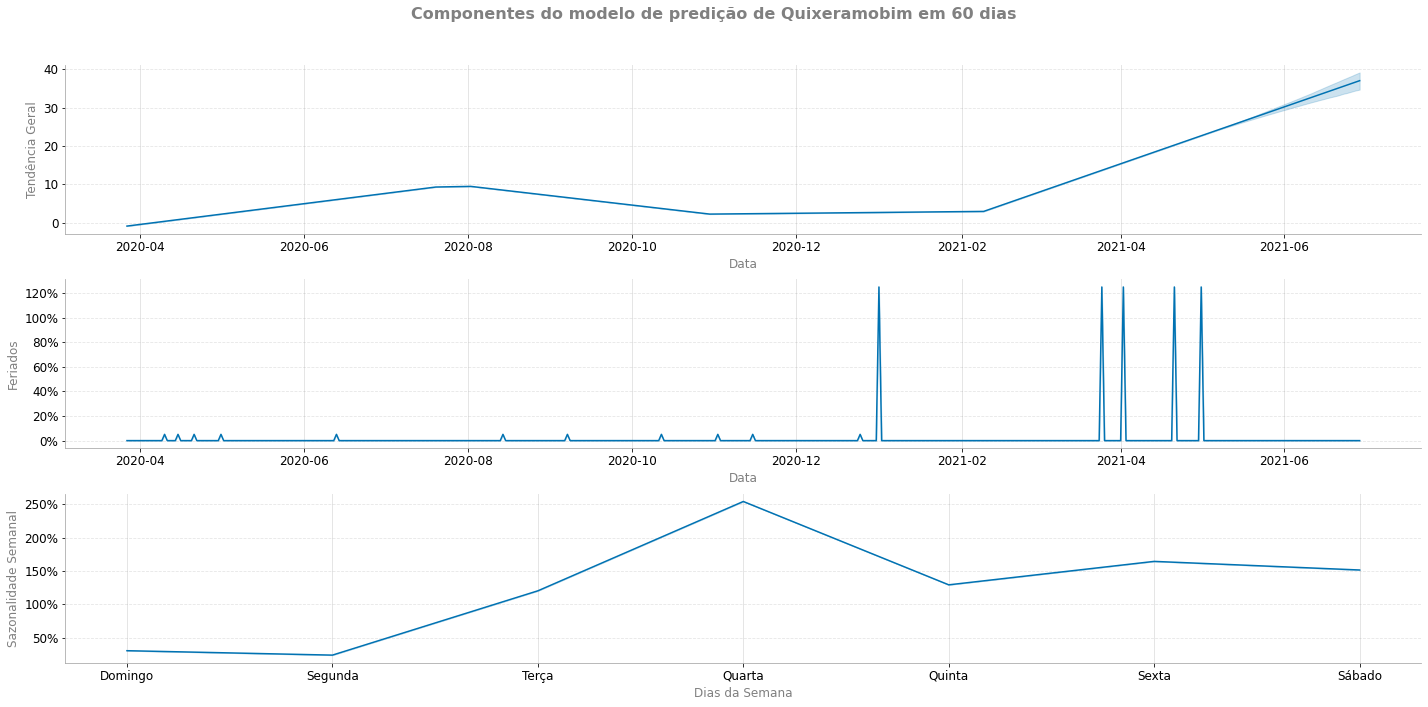

In [ ]:
plota_components(quixeramobim_treino,quixeramobim_teste,'Quixeramobim', feriados_quixeramobim)

A função de componentes demonstra como os gráficos principais do modelo de predição está sendo formulado, nesse caso temos 3 tipos de informações que agrupadas formam o modelo, são elas:

**Tendência Geral:** mostra o comportamento dos dados ao longo das datas que vão de 2020 - 04 até 2021 - 06. Esse intervalo de confiânça (mancha azul) é a resposta que o próprio Prophet gera ao modelo como forma de prever possíveis erros nas predições.

**Feriados:** mostra um gráfico de picos, com informações pontuais indicando as quantidades médias de queda ou não nos numeros de casos

**Sazonalidade Semanal:** mostra a Sazonalidade por dias da semana dos dados

---
Observando os componentes dos dois modelos percebe-se que:
 
* Existe um crescimento da tendência com a chegada do ano de 2021 (isso se explica pela atual situação que o Brasil passa, com um crescente número de casos e um baixo número de vacinação.

* A Sazonalidade Semanal demonstra uma baixa sempre aos domingos e segunda. Isso pode estar relacionado com as testagem e notificações dos dados em feriados e em finais de semanas serem menores que no restante da semana.

* Observa-se que entre Quixeramobim e Quixadá existe uma diferença entre  os dados de feriados, não existe uma diminuição dos picos de casos relativos aos feriados em Quixeramobim (como existe em Quixadá). **A Hipotese** é que sso pode estar relacionado ao fato de que em Quixeramobim, existe o principal ponto de atendimento hospitalar que é o Hospital Regional do Sertão Central, esse se mantem funcionando o tempo todo, pois precisa atender toda a região.

Será definido uma janela de tempo entre os valores  [50 - 70]  uma vez que se observou, que os modelos responderam bem a esse periodo de tempo. Acredita-se que o mesmo irá acontecer quando for feito o tratamento com os Outliers, que é o próximo passo

## **4.4 Outliers**

Primeiro entendendo o que são Outliers: Outliers são pontos fora do do padrão da curva da série temporal, eles geralmente ficam fora da mancha azul que seria a zona de segurança. Acontecem devido a erros de notificação ou medição e devem ser removidos, utilizando como critério sua posição fora (ou não) da mancha azul(intervalo de confiânça) que contorna nossa curva principal (tendência).

In [ ]:
display(quixada_treino)
display(quixeramobim_treino)

ds    y
18796 2020-03-27    0
18797 2020-03-28    2
18798 2020-03-29    0
18799 2020-03-30    0
18800 2020-03-31    0
...          ...  ...
77683 2021-04-26  194
77684 2021-04-27   66
77685 2021-04-28    7
77686 2021-04-29   55
77687 2021-04-30    0

[400 rows x 2 columns]

ds    y
19050 2020-03-27    0
19051 2020-03-28    0
19052 2020-03-29    0
19053 2020-03-30    0
19054 2020-03-31    0
...          ...  ...
78035 2021-04-26   37
78036 2021-04-27  122
78037 2021-04-28    7
78038 2021-04-29   45
78039 2021-04-30    0

[400 rows x 2 columns]

Antes de tudo, deve-se resetar o index e encontrar os pontos que estão fora do intervalo de confiança de cima (yhat_upper) e de baixo (yhat_lower)

Depois plotar o gráfico com a remoção dos Ouliers

Para facilitar a leitura do código também foi desenvolvida uma função que retira outliers `sem_outlier` e uma que plota os gráficos `plota_outlier`

In [ ]:
quixada_outlier=sem_outlier(quixada_treino,feriados_quixada)
quixeramobim_outlier=sem_outlier(quixeramobim_treino,feriados_quixeramobim)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

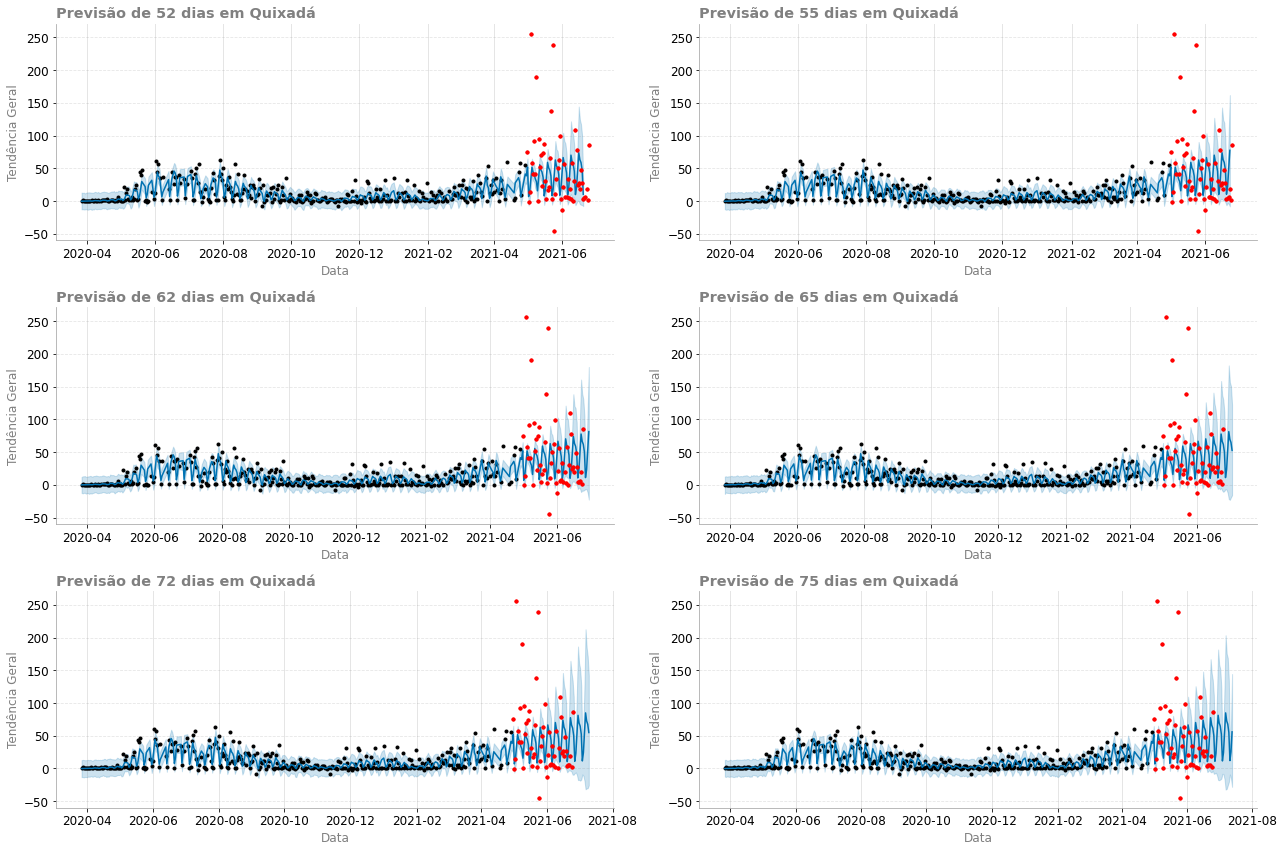

In [ ]:
plota_outlier(quixada_outlier,quixada_teste,feriados_quixada,'Quixadá')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

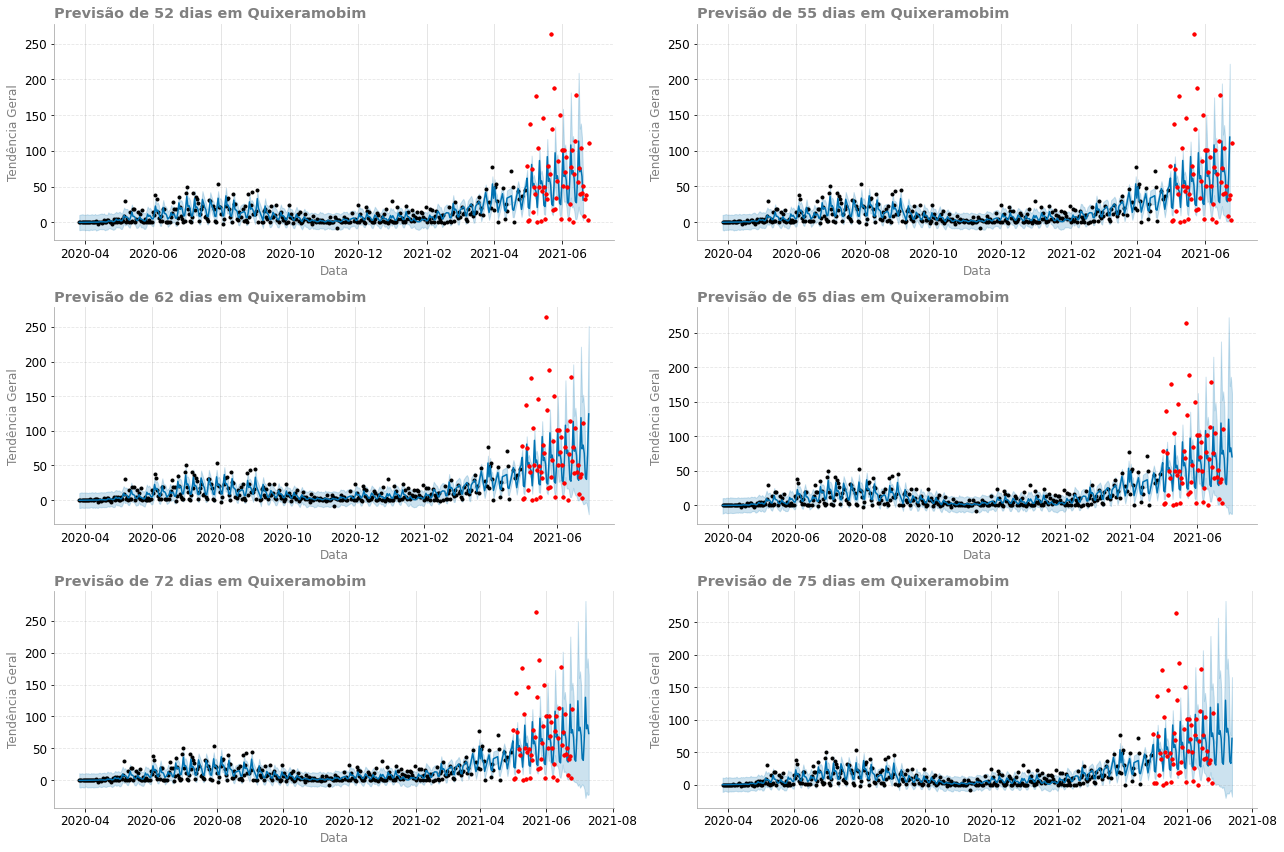

In [ ]:
plota_outlier(quixeramobim_outlier,quixeramobim_teste,feriados_quixeramobim,'Quixeramobim')

Quixadá teve uma resposta melhor que Quixeramobim, mas ambos tiveram melhores resultados na janela temporal com periodo de 55 dias

chamando as funções `previsao`e `previsao_components`

**Quixadá**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


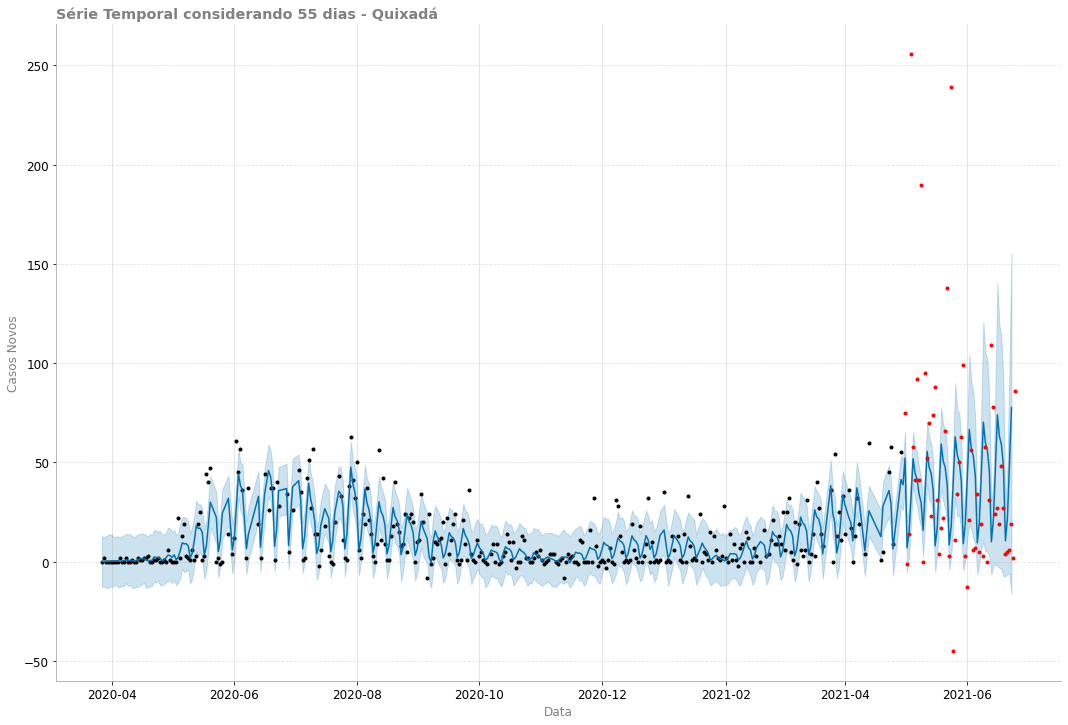

In [ ]:
previsao(quixada_outlier,quixada_teste,feriados_quixada, 'Quixadá',55)

**Componentes de Quixadá**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


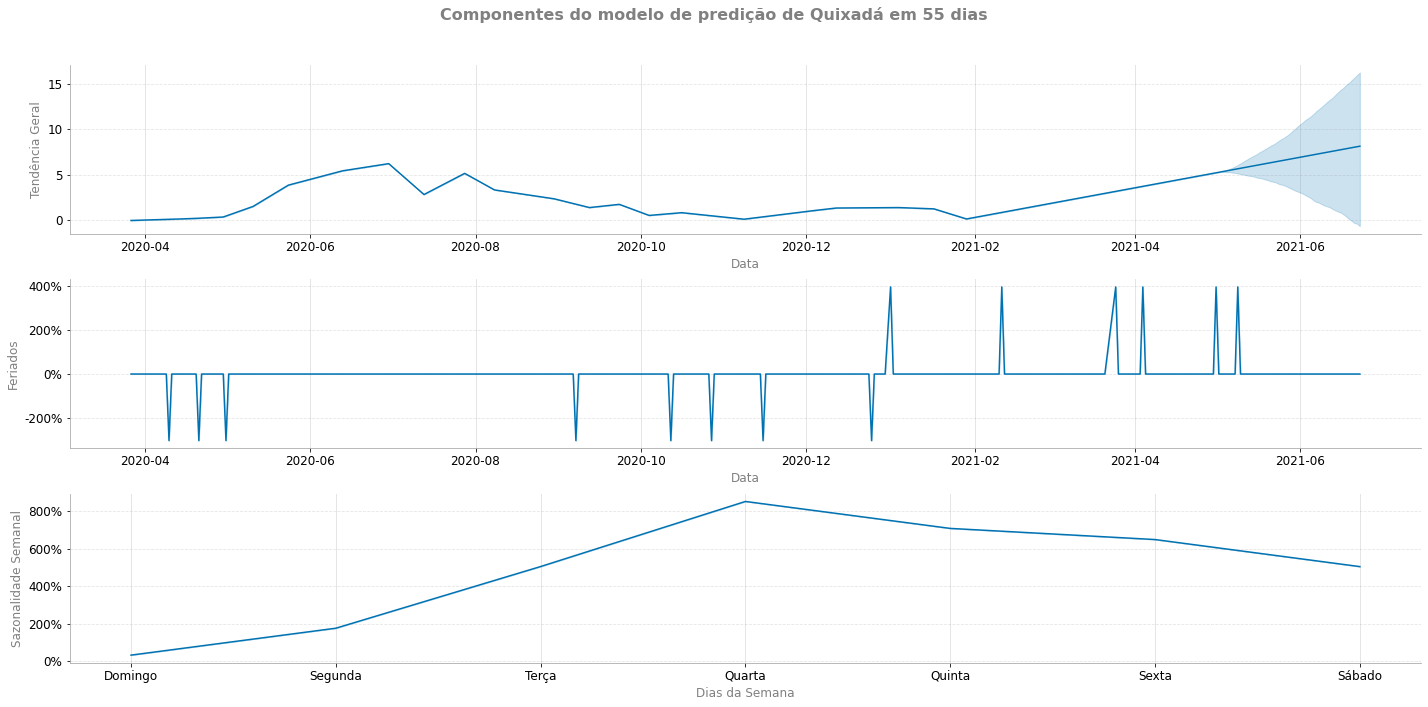

In [ ]:
previsao_components(quixada_outlier,quixada_teste,feriados_quixada,'Quixadá',55)

**Quixeramobim**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


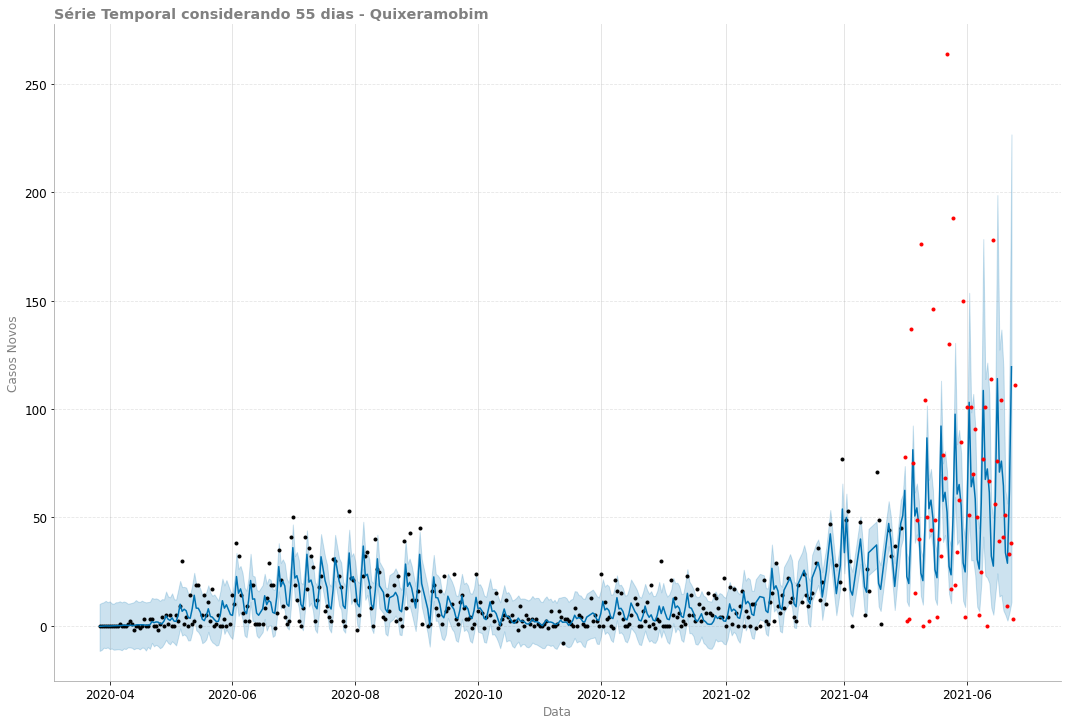

In [ ]:
previsao(quixeramobim_outlier,quixeramobim_teste,feriados_quixeramobim,'Quixeramobim',55)

**Componentes de Quixeramobim**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


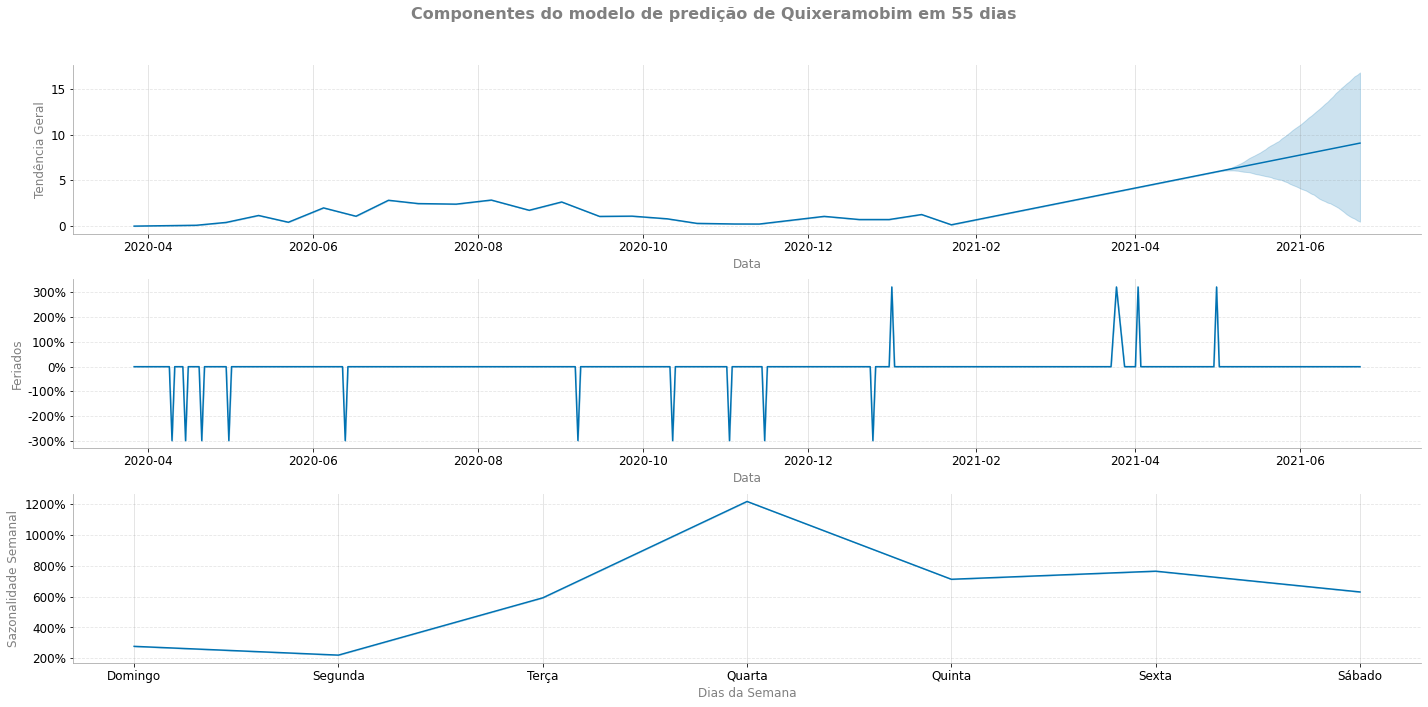

In [ ]:
previsao_components(quixeramobim_outlier,quixeramobim_teste,feriados_quixeramobim,'Quixeramobim',55)

A linha de tendencia apresenta-se similar aos dos modelos anteriores.

Vale destacar que tanto em Quixadá como em Quixeramobim os picos de feriados não são tão expressivos em 2021, isso pode ser explicado pela retirada dos outliers e do número menor de feriados informados, se comparar com 2020. Os Outliers acabavam por enviesar negativamente as análises e com os ajustes o modelo conseguiu uma melhor perfomance

A Sazonalidade semanal demonstra a queda dos casos nos finais de semana e  na segunda feira por sofrer diretamente influência do fim de semana

---
---

Nesse modelo final quase todos os outliers foram removidos, a curva se ajustou bem a tendência, assim como alguns dados de treino, alguns dados de teste não se encontraram totalmente dentro do intervalo de confiança, mas a grande maioria sim.

Nos gráficos acima, o modelo conseguiu performar muito bem até 80 dias mais ou menos depois disso começava a aumentar muito o intervalo de confiança

## 4.5 Validação (Cross Validation)

A Cross Validation é uma ferramenta de diagnóstico do modelo, foi desenvolvida para medir nosso modelo usando dados históricos, com a mesma quantidade de dados que tínhamos antes. Ela permite comparar valores de previsão com valores existentes.

Para criar um dataframe para o CrossValidation, vamos os seguintes parâmetros:

* Inital: Dados usados para o treinamento
* Horizon: Pode ser definido como o tamanho da previsão
* Period: O espaçamento temporal que o horizonte deverá prever

Pensando nisso foi criado para usar o modelo aplicado ao Cross validation, `modelo_cross_v`

In [ ]:
modelo_quixeramobim = modelo_cross_v(quixeramobim_outlier,quixeramobim_teste,feriados_quixeramobim)
modelo_quixada = modelo_cross_v(quixada_outlier,quixada_teste,feriados_quixada)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_cv = cross_validation(modelo_quixada, initial = '180 days', period = '30 days', horizon = '30 days')
df_cv2 = cross_validation(modelo_quixeramobim, initial = '180 days', period = '30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-10-01 00:00:00 and 2021-03-30 00:00:00


INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-10-01 00:00:00 and 2021-03-30 00:00:00


Definimos aqui um treinamento de 180 dias, que será analisado com espaçamento de 30 em 30 dias, o que deu como resultado 7 previsões. Vamos analisar os resultados


In [ ]:
df_cv['cutoff'].unique()

array(['2020-10-01T00:00:00.000000000', '2020-10-31T00:00:00.000000000',
       '2020-11-30T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-02-28T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000'], dtype='datetime64[ns]')

Datas que marcam o ínicio do nossos dados de teste

In [ ]:
df_cv.head()

ds      yhat  yhat_lower  yhat_upper  y     cutoff
0 2020-10-02  4.746073   -8.091612   18.481002  5 2020-10-01
1 2020-10-03  2.431098  -10.429113   15.963754  1 2020-10-01
2 2020-10-04  0.338327  -12.409768   13.039243  0 2020-10-01
3 2020-10-05  0.703511  -11.419264   14.548305 -1 2020-10-01
4 2020-10-07 -0.097343  -14.467912   14.840525  4 2020-10-01

Dataframe de validação cruzada

In [ ]:
janela = 5 #janela temporal criada

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values==cutoff]

Text(0.5, 0, 'ds')

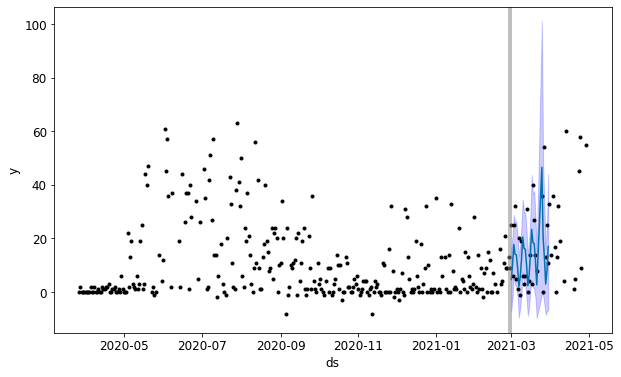

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo_quixada.history['ds'].values, modelo_quixada.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
cutoff2 = df_cv2['cutoff'].unique()[janela]
df_cv_cut2 = df_cv2[df_cv2['cutoff'].values==cutoff]

Text(0.5, 0, 'ds')

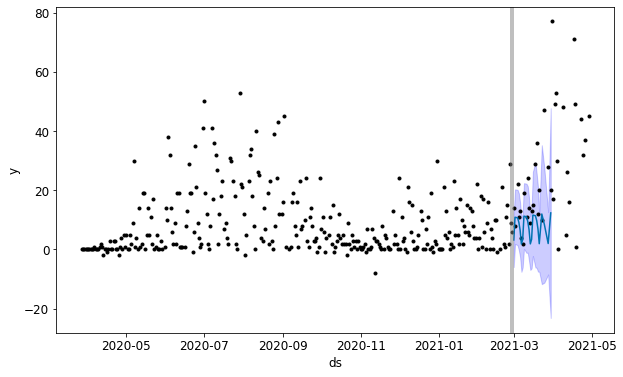

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo_quixeramobim.history['ds'].values, modelo_quixeramobim.history['y'], 'k.')
ax.plot(df_cv_cut2['ds'].values, df_cv_cut2['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut2['ds'].values, df_cv_cut2['yhat_lower'],
                df_cv_cut2['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

Esse gráfico representa o gráfico que plotamos até aqui, com um acrescimo da linha cinza vertical. A linha azul (série temporal) e o intervalo de confiânça na linha em azul:

Representam o trecho anterior que foi utilizado para teste. Ele usou todos os pontos pretos anterior a linha cinza, para treinar um modelo de série temporal e depois ele utilizou esse trecho para testar esse modelo. O Cross validation é uma ferramenta estatistica, que ajuda a medir quanto o modelo esta generalizando bem ou mal os dados

* Em cinza temos o cuttoff
* Em azul o intervalo de confiânca e o trecho que foi usado para teste

**Métricas de perfomance**

Utilizando as métricas de perfomances para entender como anda funcionando o modelo

In [ ]:
df_p = performance_metrics(df_cv)
df_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae     mdape  coverage
0   3 days  236.169018  15.367792  10.155461  0.990468  0.685185
1   4 days  231.734888  15.222841  10.237964  1.567305  0.658730
2   5 days  131.238066  11.455918   7.832278  1.545710  0.731481
3   6 days   99.292912   9.964583   7.449472  1.312895  0.769841
4   7 days   88.685895   9.417319   7.987831  1.312895  0.796296
5   8 days   71.834159   8.475503   6.763196  1.186846  0.849206
6   9 days   88.014294   9.381593   7.416040  1.015814  0.809524
7  10 days   97.283927   9.863261   7.278039  1.184375  0.777778
8  11 days  156.792889  12.521697   9.153580  1.431398  0.682540
9  12 days  171.838070  13.108702   9.737970  2.064372  0.685185
10 13 days  204.661716  14.306003  11.014448  2.690932  0.685185
11 14 days  406.406219  20.159519  15.409491  2.185406  0.531746
12 15 days  450.684900  21.229341  16.246301  2.338727  0.462963
13 16 days  440.193016  20.980777  15.174371  1.940080  0.539683
14 17 days  334.238473  18.282190  13.294791  4.420969  0.666667
15 18 days  373.871857  19.335766  13.275678  4.619868  0.722222
16 19 days  370.112263  19.238302  13.642884  4.619868  0.703704
17 20 days  356.162568  18.872270  13.822694  3.114933  0.703704
18 21 days  343.659835  18.538064  15.193413  1.900161  0.648148
19 22 days  445.683445  21.111216  18.004360  2.981145  0.555556
20 23 days  616.818119  24.835823  19.799837  5.884928  0.523810
21 24 days  563.025681  23.728162  18.126915  5.884928  0.666667
22 25 days  573.709710  23.952238  18.293698  2.037505  0.666667
23 26 days  440.067362  20.977783  17.193753  2.037505  0.666667
24 27 days  625.086849  25.001737  21.471989  2.556892  0.563492
25 28 days  639.665348  25.291606  21.959912  2.667905  0.626984
26 29 days  778.701821  27.905229  24.925202  2.556892  0.555556
27 30 days  951.304879  30.843231  24.094450  4.481785  0.685185

As métricas que foram calculadas serão aqui analisadas em forma de gráfico. A dispersão dos dados representa a qualidade, quanto menor ela for, melhor terá perfomado o modelo.

Se observamos o gráfico conseguimos perceber que com o passar dos números de dias aumenta tbm os valores das métricas e isso significa que com o passar dos dias diminuem as nossas chances de erro e aumenta a nossa precisão de acertos.

**Quixadá**

**MSE:** Média do erro ao quadrado

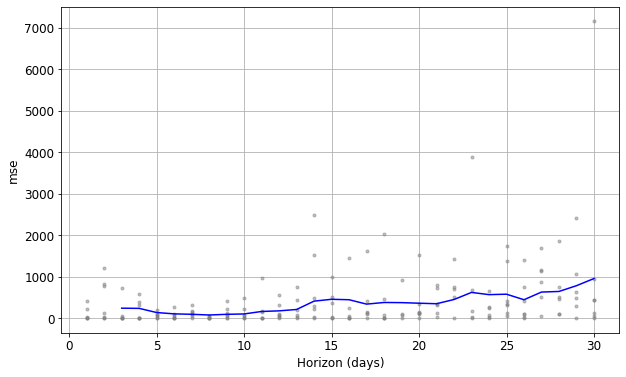

In [ ]:
plot_cross_validation_metric(df_cv,metric='mse');

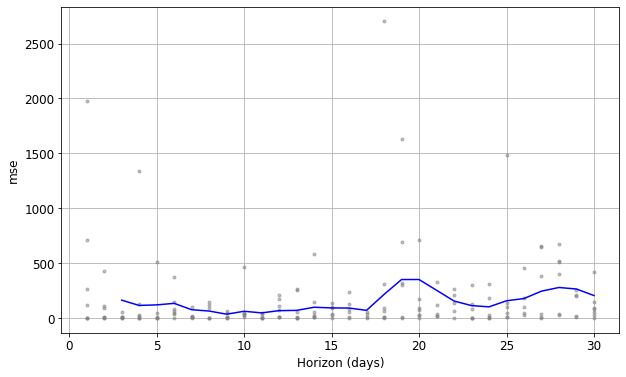

In [ ]:
plot_cross_validation_metric(df_cv2,metric='mse');

**MDAPE:** Média do erro absoluto percentual

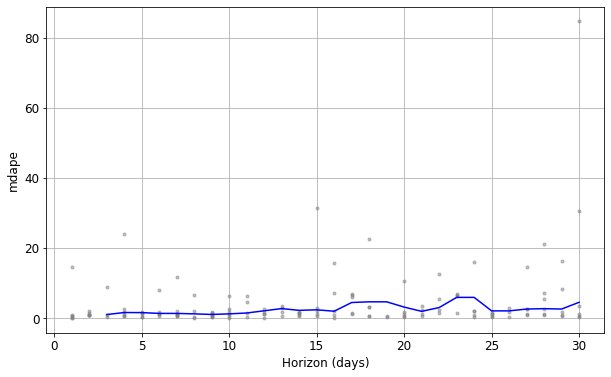

In [ ]:
plot_cross_validation_metric(df_cv , metric='mdape');

Utilizando os 30 dia é possivel atestar se o crossvalidation está  ou não generalizando os dados com o espaçamento.
Observando os dois gráficos acima é possivel ver a maioria dos pontos não encontram-se dispersos e bem concentrados abaixo do modelo, próximos a zero.

**RMSE:** Raiz quadrada da Média do erro ao quadrado

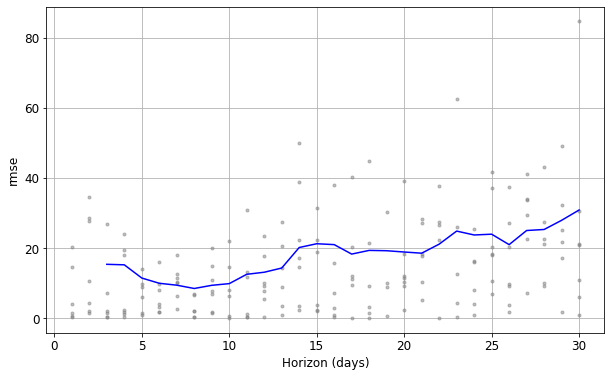

In [ ]:
plot_cross_validation_metric(df_cv,metric='rmse');

Aqui é possivel ver uma dispersão maior dos dados, porém a grande maioria ainda estão abaixo da linha. O que é bom 

**MAE:** Média do erro absoluto

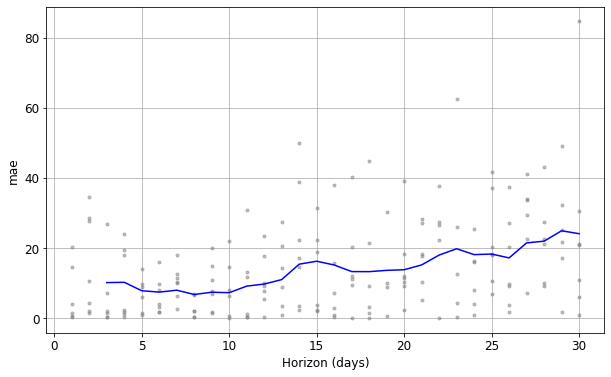

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae'); 

Tanto no **RMSE**, quanto no **MAE** é possivel ver uma dispersão maior dos dados, porém a grande maioria ainda estão abaixo da linha. O que é bom para o modelo

**Quixeramobim**

**MSE:** Média do erro ao quadrado

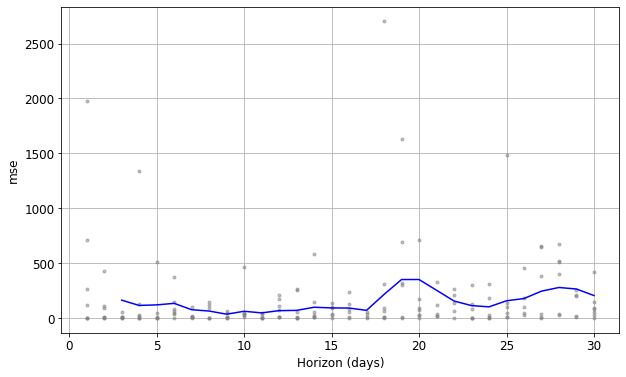

In [ ]:
plot_cross_validation_metric(df_cv2,metric='mse');

**MDAPE:** Média do erro absoluto percentual

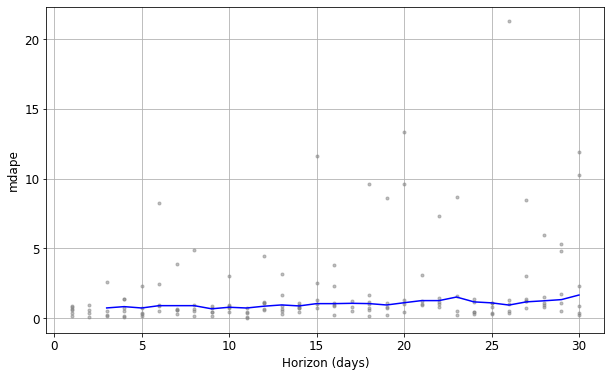

In [ ]:
plot_cross_validation_metric(df_cv2 , metric='mdape');

Observando os dois gráficos acima é possivel ver a maioria dos pontos não encontram-se dispersos e bem concentrados abaixo do modelo, próximos a zero, muito embora o **MSE**, tenha variado com o passar dos dias.

**RMSE:** Raiz quadrada da Média do erro ao quadrado

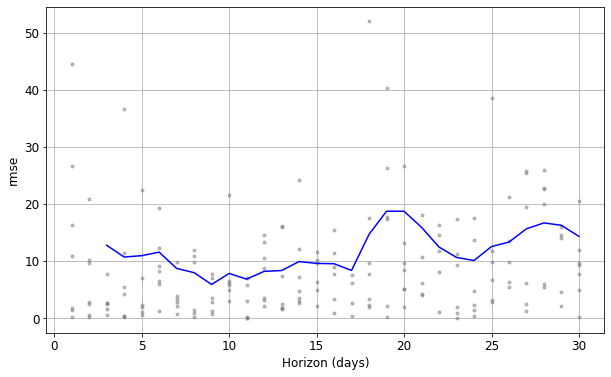

In [ ]:
plot_cross_validation_metric(df_cv2,metric='rmse');

**MAE:** Média do erro absoluto

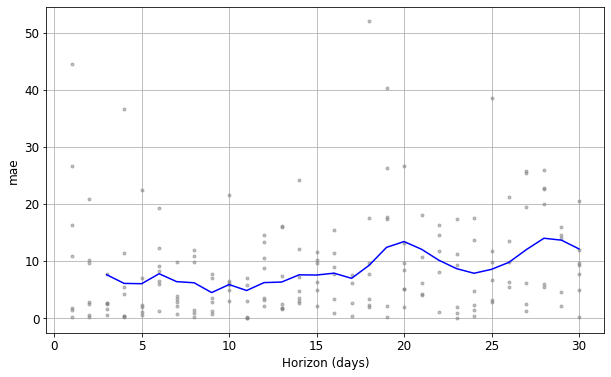

In [ ]:
plot_cross_validation_metric(df_cv2, metric='mae'); 

Nesses dois ultimos gráficos  é possivel ver uma dispersão maior dos dados quando comparado com quixadá , porém a grande maioria ainda estão abaixo da linha e próximo a zero. O que é bom

**Conclusão**

O que observamos nessa análise é que os dados do modelo possuem um comportamento mais disperso quando aumenta o número de dias. Entre os dois modelos o de Quixadá conseguiu obter uma perfomance mais satisfatória no geral 

#**5.0 CONCLUSÕES** 


* Quixadá e Quixeramobim são os municipios que mais foram impactados dentro do Sertão Central enquanto Deputado Irapuã Pinheiro, possui o menor impacto. Assim como suspeitava nas **hipótese 1** e **hipótese 3**

* Contudo a **Hipotese 2** é falsa Quixeramobim é o municipio com maior números de casos e mortes por Covid-19. A explicação é muito inconclusiva, mas por ser o local que registra obitos e casos (ja que a sede do Hospital Regional se localiza em seu território) talvez possa ser um indicativo de porque isso acontece.

* As datas de maior destaque  nas análises de taxa de crescimento, média móvel ficam para  os picos de 2020-05 - 2020-07 e 2021-03 - 2021-06. Como foi dito na [parte 2](https://github.com/Glaudemias/Projeto_COVID_Sertao_CENTRAL/blob/main/Notebooks/PROJETO_PARTE_2_.ipynb) desse projeto, essas datas refletem o pico de contaminações das regiões e os momentos em que o Ceará se torna o terceiro estado com maior número de contaminações de covid-19 no Brasil. Ja as datas de 2021 além de rebaterem com os picos avistados nas análises das regiões, vai de encontro com a noticia de que nesse período nota-se um novo crescimento de casos nas regiões do estado do Ceará.

* O ano de 2021 marca a grande explosão de casos quando comparado com 2020, o que pode ser explicado por diversos fatores que juntos formam a má conduto que o Brasil e seu governo lidam com a pandemia. Aliado ao baixo número de vacinações na região não é possivel notar uma queda muito drástica nos números de casos novos.

**A ultima hipotese, diz:**

`Hipotese 5: Mesmo com a vacinação as curvas de casos novos não se estabilizaram`

* Pode-se confirmar que sim, os modelos preditivos  mostraram uma curva ascendente na têndencia dos dados, os fatores são diversos, que vão desde como ja dito a forma que o Brasil trata a pandemia e como agora vem tratando a vacinação, ja se sabe que existe um número expressivo de pessoas que não se vacinaram ou [não tomaram a segunda dose](https://www.cnnbrasil.com.br/saude/2021/06/07/rio-de-janeiro-82-mil-pessoas-nao-retornaram-para-tomar-segunda-dose-de-vacina)

* Nos modelos preditivos, percerbe-se que existe uma queda da Sazonalidade Semanal, nos finais de semana e isso pode estar relacionado com a não notificação de casos nesses dias, assim como ocorria nos feriados. A segunda feira é um dia que acaba sendo afetado pelo final de semana e isso explica porque ele sempre aparecia abaixo dos outros dias da semana

* Nas previsões destaca-se Quixadá como um modelo com melhor perfomance e isso pode ser explicado inclusive pelo municipio não apresentar números tão expressivos. A série de COVID-19 é uma serie temporal com explosões de dados em determinados períodos de tempo e isso acaba por complicar e influenciar na dispersão dos pontos no modelo

---



---
**Para avançar na analise:**

Uma boa analise a ser feita, seria aplicar a metodologia e o modelo aos dataframes de outras regiões, tanto as mais afetadas como as regiões interioranas.

Um segundo momento é tentar melhorar ainda mais o modelo de previsão principalmente para Quixeramobim, tentando evitar que tantos dados de treino e testes fiquem fora do intervalo de confiânça 

# **6.0 REFERÊNCIAS**

[01] - [Reportagem 1](https://diariodonordeste.verdesmares.com.br/regiao/todas-as-regioes-do-ceara-apresentaram-mais-mortes-por-covid-19-em-2021-que-2020-exceto-a-de-sobral-1.3096088) - *Todas as regiões do Ceará apresentaram mais mortes por Covid-19 em 2021 que 2020, exceto a de Sobral*

[02] - [Reportagem 2](https://diariodonordeste.verdesmares.com.br/regiao/oros-implanta-medidas-restritivas-para-conter-covid-19-veda-aulas-presenciais-e-pontos-turisticos-1.3078419) - *Orós implanta medidas restritivas para conter Covid-19, veda aulas presenciais e pontos turísticos*

[03] - [Reportagem 3](https://diariodonordeste.verdesmares.com.br/regiao/ico-tem-100-de-leitos-de-uti-lotados-desde-inicio-de-maio-1.3093287) - *Icó tem 100% de leitos de UTI lotados desde início de maio*

[04] - [Reportagem 4](https://covidreference.com/timeline_pt) - *Linha do Tempo Covid-19 no mundo*

[05] - [Reportagem 5](https://www.otempo.com.br/interessa/primeiro-caso-de-coronavirus-fora-da-asia-e-registrado-nos-eua-1.2287219) - *Primeiro caso de coronavírus fora da Ásia é registrado nos EUA*

[06] - [Reportagem 6](https://g1.globo.com/ciencia-e-saude/noticia/2020/02/15/primeira-morte-ligada-ao-coronavirus-fora-da-asia-e-confirmada-na-franca.ghtml) - *Primeira morte ligada ao coronavírus fora da Ásia é confirmada na França*

[07] - [Reportagem 7](https://g1.globo.com/sp/sao-paulo/noticia/2020/08/26/primeiro-caso-confirmado-de-covid-19-no-brasil-ocorreu-em-sp-e-completa-seis-meses-nesta-quarta.ghtml) - *Primeiro caso confirmado de Covid-19 no Brasil ocorreu em SP e completa seis meses nesta quarta*

[08] - [Reportagem 8](https://www.conjur.com.br/2021-jan-13/bolsonaro-tentou-sabotar-combate-coronavirus-ong) - *Bolsonaro tentou sabotar combate ao coronavírus, diz Human Rights Watch*

[09] - [Reportagem 9](https://www.uol.com.br/vivabem/noticias/agencia-estado/2021/06/22/preco-que-o-governo-pagou-por-vacina-indiana-covaxin-foi-1000-mais-alto.htm) - *Preço que o governo pagou por vacina indiana Covaxin foi 1000% mais alto*

[10] -[Reportagem 10](https://g1.globo.com/ce/ceara/noticia/2020/03/15/tres-primeiros-casos-de-coronavirus-no-ceara-sao-confirmados-pela-secretaria-da-saude.ghtml) - *Três primeiros casos de coronavírus no Ceará são confirmados pela Secretaria da Saúde*

[11] - [Reportagem 11](https://oglobo.globo.com/epoca/sociedade/ele-esta-incentivando-baderna-desabafo-de-enfermeira-apos-bolsonaro-pedir-que-seguidores-invadam-hospitais-24477843) - *'Ele está incentivando a baderna': o desabafo de enfermeira após Bolsonaro pedir que seguidores invadam hospitais*

[12] - [Reportagem 12](https://g1.globo.com/ce/ceara/noticia/2021/05/09/casos-de-covid-19-no-ceara-em-9-de-maio-de-2021.ghtml) - *Ceará registra mais de 716 mil casos de Covid-19 e 18.538 óbitos pela doença*

[13] - [Reportagem 13](https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil) - *Linha do tempo do Coronavírus no Brasil*

[14] - [Reportagem 14](https://www.cnnbrasil.com.br/saude/2021/06/07/rio-de-janeiro-82-mil-pessoas-nao-retornaram-para-tomar-segunda-dose-de-vacina)- *Rio de Janeiro: 82 mil pessoas não retornaram para tomar segunda dose de vacina*

[15] - [Portal 1](https://covid.saude.gov.br/) - *Portal oficial do Covid*

[16] - [Documento 1](https://www.ipece.ce.gov.br/wp-content/uploads/sites/45/2014/02/TD_111.pdf) - *IPECE - AS REGIÕES DE PLANEJAMENTO DO
ESTADO DO CEARÁ*

[17] - [Outros 1](https://stackoverflow.com/questions/63974040/line2d-object-has-no-property-column)- *Transformando um DATAFRAME em GEODATAFRAME*